## SALES FORECASTING USING WALMART STORES

### Introduction:

#### Implementing a solid and accurate sales forecasting model is vital for Walmart to improve inventory management, enhance operations and strategic decisions, mitigate financial risks, and ultimately create or maintain a competitive advantage in the retail market. This project aims to develop a predictive model that accurately forecasts weekly sales for Walmart stores. This will be achieved by leveraging historical sales data and incorporating range of external factors.

### Data Overview:

#### A comprehensive dataset provided by Walmart, encompassing weekly sales data from 45 stores over a three-year period was utilized. This dataset includes additional features such as store size, temperature, fuel prices, unemployment rates, and holiday indicators. 

### Preprocessing Steps:

#### •	Handling missing  by filling in blank fields with the mean values
#### •	Feature engine such as (e.g., encoding holidays, extracting temporal features)
#### •	Univariate and Bivariate analysis
#### •	Train-test split

### Methodology:

#### The approach involved applying time series analysis and machine learning techniques to model and predict sales patterns. We evaluated multiple models, including Linear Regression, Decision Tree, Random Forest, and Long Short-Term Memory (LSTM) networks, to determine the most effective forecasting method.

### Key Findings:

#### •	LSTM Model Performance: The LSTM model demonstrated superior accuracy in capturing complex temporal dependencies, leading to more precise sales forecasts.
#### •	Influential Factors: Key determinants of sales included store size, holiday periods, and external economic indicators.
#### •	Business Impact: Accurate sales predictions enable better inventory planning, targeted marketing campaigns, and efficient resource allocation.

### Conclusion:

#### By implementing advanced forecasting models, Walmart can make data-driven decisions that enhance operational efficiency and customer satisfaction. This project underscores the importance of integrating machine learning techniques into retail analytics for strategic advantage.


In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Exploratory Data Analysis (EDA)

In [5]:
# Loading the required data files
stores_data = pd.read_csv('/Users/baldwindyce/Documents/stores.csv')
sales_data = pd.read_csv('/Users/baldwindyce/Documents/sales_data.csv')
features_data = pd.read_csv('/Users/baldwindyce/Documents/features.csv')

In [7]:
# Displaying the first few rows of each DataFrame
print("Sales Data:")
print(sales_data.head())
print("\nStores Data:")
print(stores_data.head())
print("\nFeatures Data:")
print(features_data.head())

Sales Data:
   Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  2010-02-05      24924.50      False
1      1     1  2010-02-12      46039.49       True
2      1     1  2010-02-19      41595.55      False
3      1     1  2010-02-26      19403.54      False
4      1     1  2010-03-05      21827.90      False

Stores Data:
   Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3      4    A  205863
4      5    B   34875

Features Data:
   Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  2010-02-05        42.31       2.572        NaN        NaN   
1      1  2010-02-12        38.51       2.548        NaN        NaN   
2      1  2010-02-19        39.93       2.514        NaN        NaN   
3      1  2010-02-26        46.63       2.561        NaN        NaN   
4      1  2010-03-05        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN 

In [9]:
# Getting information about the DataFrames
print("\nSales Data Info:")
print(sales_data.info())
print("\nStores Data Info:")
print(stores_data.info())
print("\nFeatures Data Info:")
print(features_data.info())


Sales Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB
None

Stores Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB
None

Features Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 # 

In [11]:
# Calculating and displaying summary statistics
print("\nSales Data Summary Statistics:")
print(sales_data.describe())
print("\nStores Data Summary Statistics:")
print(stores_data.describe())
print("\nFeatures Data Summary Statistics:")
print(features_data.describe())


Sales Data Summary Statistics:
               Store           Dept   Weekly_Sales
count  421570.000000  421570.000000  421570.000000
mean       22.200546      44.260317   15981.258123
std        12.785297      30.492054   22711.183519
min         1.000000       1.000000   -4988.940000
25%        11.000000      18.000000    2079.650000
50%        22.000000      37.000000    7612.030000
75%        33.000000      74.000000   20205.852500
max        45.000000      99.000000  693099.360000

Stores Data Summary Statistics:
           Store           Size
count  45.000000      45.000000
mean   23.000000  130287.600000
std    13.133926   63825.271991
min     1.000000   34875.000000
25%    12.000000   70713.000000
50%    23.000000  126512.000000
75%    34.000000  202307.000000
max    45.000000  219622.000000

Features Data Summary Statistics:
             Store  Temperature   Fuel_Price      MarkDown1      MarkDown2  \
count  8190.000000  8190.000000  8190.000000    4032.000000    2921.000000 

In [13]:
# Checking for missing values
print("\nSales Data Missing Values:")
print(sales_data.isnull().sum())
print("\nStores Data Missing Values:")
print(stores_data.isnull().sum())
print("\nFeatures Data Missing Values:")
print(features_data.isnull().sum())


Sales Data Missing Values:
Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

Stores Data Missing Values:
Store    0
Type     0
Size     0
dtype: int64

Features Data Missing Values:
Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64


In [15]:
# Checking for Systematic Issues in Weekly Sales Data (sales records that are zero or negative).
sales_data_check = sales_data.loc[sales_data['Weekly_Sales'] <= 0]
sales_data_check.shape

(1358, 5)

In [17]:
# Finding the number of unique values in each column of the sales_df_check DataFrame.
sales_data_check.nunique()

Store            45
Dept             51
Date            143
Weekly_Sales    679
IsHoliday         2
dtype: int64

In [19]:
# Checking percentage of the sales data has invalid or zero sales values.
sales_data_check.shape[0]/sales_data.shape[0]

0.003221291837654482

In [21]:
# Converting 'Store' and 'Dept' to String.
# Modifying 'IsHoliday' to Integer
sales_data['Store'] = sales_data['Store'].astype(str)
sales_data['Dept'] = sales_data['Dept'].astype(str)
sales_data['IsHoliday'] = sales_data['IsHoliday']*1

In [23]:
# Dropping Records with Weekly Sales Less Than or Equal to Zero.
sales_data2 = sales_data.loc[sales_data['Weekly_Sales']>0]
sales_data2.shape

(420212, 5)

In [25]:
# Displaying the data types columns in sales_df2 Dataframe
sales_data2.dtypes

Store            object
Dept             object
Date             object
Weekly_Sales    float64
IsHoliday         int64
dtype: object

### Feature Engineering

In [28]:
# Creating a function to automate some data exploration tasks performed earlier for future use.
def get_basic_stats(dfname):
    print("Shape of dataframe is " + str(dfname.shape))
    print("Below are datatypes of columns in DF")
    print(dfname.dtypes.sort_values())
    print("Below are missing values in each column")
    print(dfname.isna().sum().sort_values())
    print("Below are the number of unique values taken by a column")
    print(dfname.nunique().sort_values())
    print("Below are some records in DF")
    print(dfname.head())
    print("Basic Stats for numeric variables")
    print(dfname.describe())

In [30]:
# Exploration of the features dataset to get an initial understanding of its characteristics.
get_basic_stats(features_data)

Shape of dataframe is (8190, 12)
Below are datatypes of columns in DF
IsHoliday          bool
Store             int64
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
Date             object
dtype: object
Below are missing values in each column
Store              0
Date               0
Temperature        0
Fuel_Price         0
IsHoliday          0
CPI              585
Unemployment     585
MarkDown5       4140
MarkDown1       4158
MarkDown3       4577
MarkDown4       4726
MarkDown2       5269
dtype: int64
Below are the number of unique values taken by a column
IsHoliday          2
Store             45
Date             182
Unemployment     404
Fuel_Price      1011
CPI             2505
MarkDown2       2715
MarkDown3       2885
MarkDown4       3405
MarkDown1       4023
MarkDown5       4045
Temperature     4178
dtype: int64
Be

In [32]:
# Converting Store to String Data Type
features_data['Store'] = features_data['Store'].astype(str)
stores_data['Store'] = stores_data['Store'].astype(str)

In [34]:
# Creating a new DataFrame called features_df2 by dropping 'IsHoliday' column from the existing features_df DataFrame.
features_data2 = features_data.drop(['IsHoliday'], axis=1)

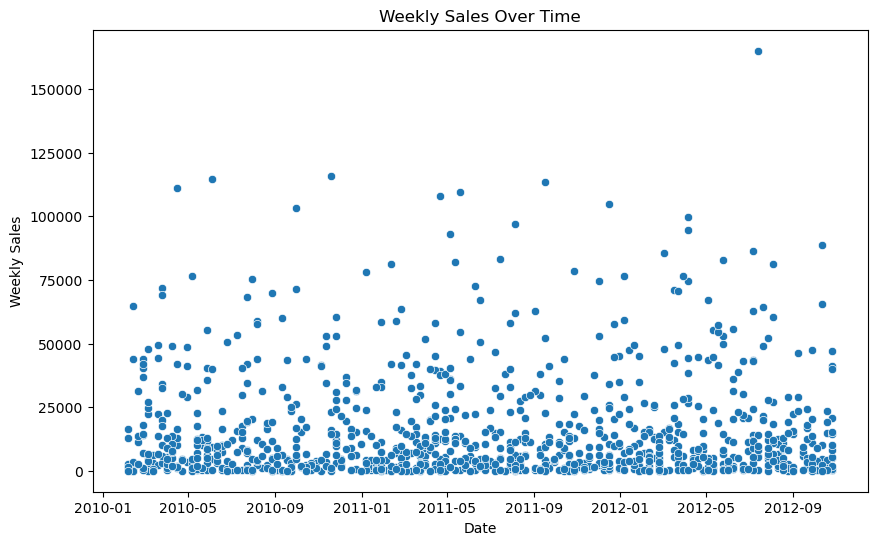

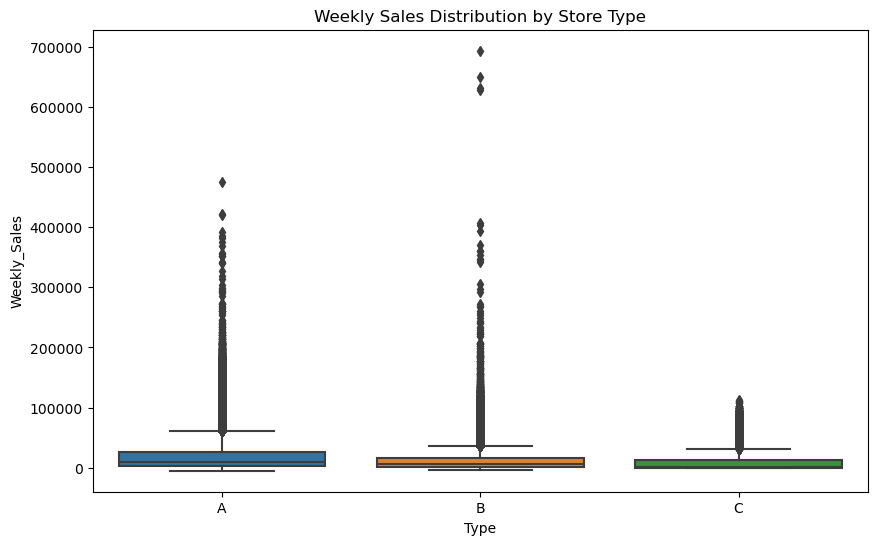

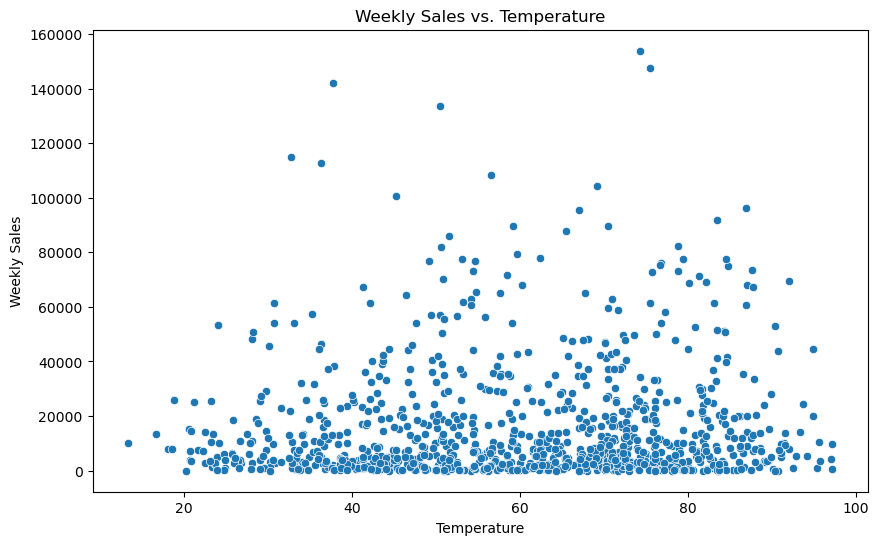

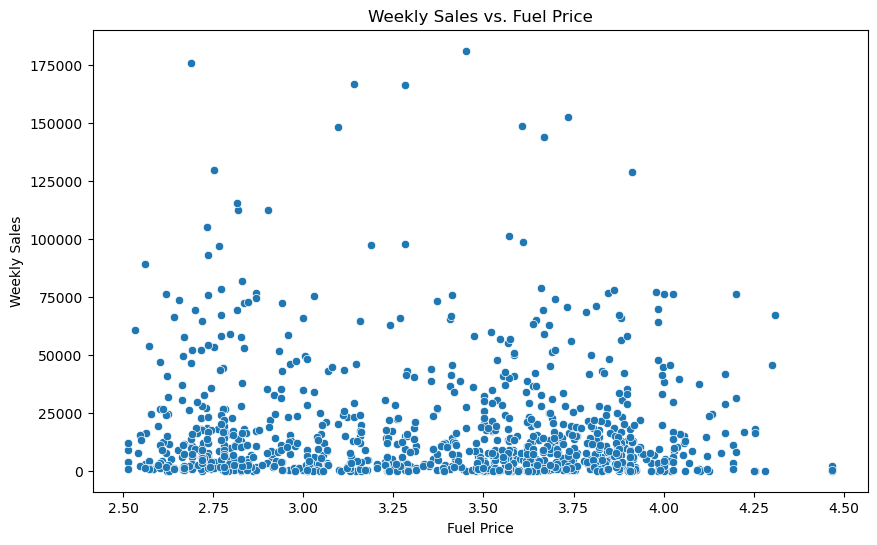

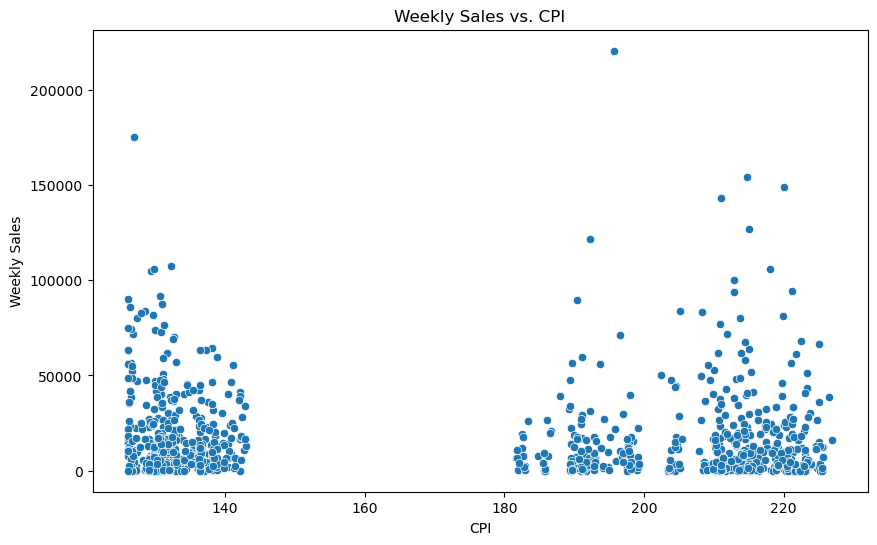

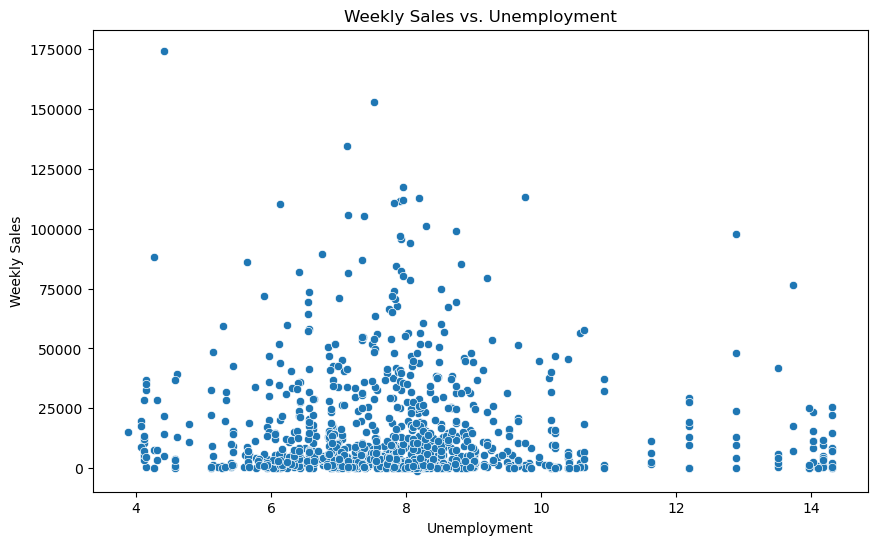

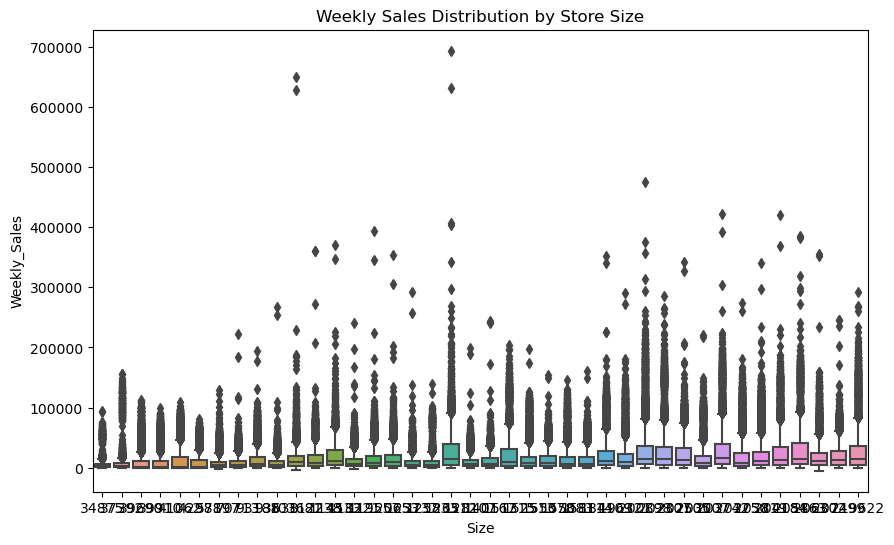

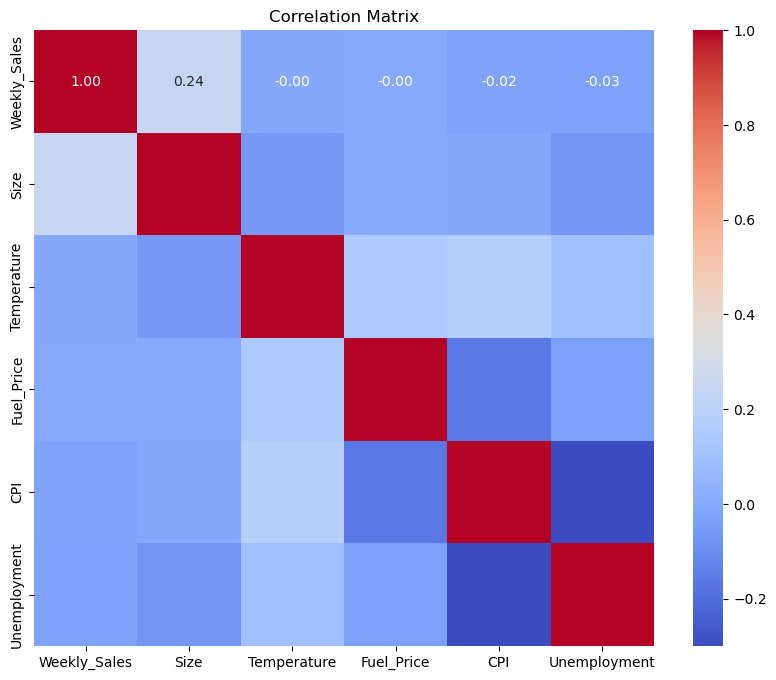

In [36]:
# Converting 'Date' column to datetime objects in both sales_data and features_data
sales_data['Date'] = pd.to_datetime(sales_data['Date'])
features_data['Date'] = pd.to_datetime(features_data['Date'])

# Ensuring 'Store' column is of the same type in both DataFrames
sales_data['Store'] = sales_data['Store'].astype(str)
features_data['Store'] = features_data['Store'].astype(str)

# Exploring the Relationship Between Date and Weekly Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Date', y='Weekly_Sales', data=sales_data.sample(1000))
plt.title('Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.show()

# Using boxplot to visualize the distribution of weekly sales by store type
plt.figure(figsize=(10,6))
sns.boxplot(x='Type', y='Weekly_Sales', data=sales_data.merge(stores_data, on='Store'))
plt.title('Weekly Sales Distribution by Store Type')
plt.show()

# Exploring the relationship between temperature and weekly sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temperature', y='Weekly_Sales', data=sales_data.merge(features_data, on=['Store', 'Date']).sample(1000))
plt.title('Weekly Sales vs. Temperature')
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.show()

# Exploring the relationship between fuel price and weekly sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Fuel_Price', y='Weekly_Sales', data=sales_data.merge(features_data, on=['Store', 'Date']).sample(1000))
plt.title('Weekly Sales vs. Fuel Price')
plt.xlabel('Fuel Price')
plt.ylabel('Weekly Sales')
plt.show()

# Exploring the relationship between CPI and weekly sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CPI', y='Weekly_Sales', data=sales_data.merge(features_data, on=['Store', 'Date']).sample(1000))
plt.title('Weekly Sales vs. CPI')
plt.xlabel('CPI')
plt.ylabel('Weekly Sales')
plt.show()

# Exploring the relationship between Unemployment and weekly sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Unemployment', y='Weekly_Sales', data=sales_data.merge(features_data, on=['Store', 'Date']).sample(1000))
plt.title('Weekly Sales vs. Unemployment')
plt.xlabel('Unemployment')
plt.ylabel('Weekly Sales')
plt.show()

# Analyzing sales by store size
plt.figure(figsize=(10, 6))
sns.boxplot(x='Size', y='Weekly_Sales', data=sales_data.merge(stores_data, on='Store'))
plt.title('Weekly Sales Distribution by Store Size')
plt.show()

# Creating a correlation matrix
merged_data = sales_data.merge(stores_data, on='Store').merge(features_data, on=['Store', 'Date'])
correlation_matrix = merged_data[['Weekly_Sales', 'Size', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


### Missing Value Imputation

In [38]:
# Handling missing data to avoid problems for machine learning algorithms
features_data2['Unemployment'].fillna(features_data2['Unemployment'].mean(), inplace=True)
features_data2['CPI'].fillna(features_data2['CPI'].mean(), inplace=True)

In [39]:
# Addressing missing values in the 'MarkDown' variables.
features_data2.fillna(0, inplace=True)

In [40]:
# Calculating the average size for each store type.
stores_data.groupby('Type').agg({'Size':'mean'})

Size
Type               
A     177247.727273
B     101190.705882
C      40541.666667

### Data Preparation

In [42]:
# Using groupby and size functions to check for any duplicate store-date and store-dept-date combinations
features_data2.groupby(['Store', 'Date']).size().shape[0] - features_data2.shape[0]

0

In [43]:
sales_data.groupby(['Store', 'Dept', 'Date']).size().shape[0] - sales_data.shape[0]

0

In [45]:
# Merging sales_data2 and features_data2 datasets
sales_features_data = pd.merge(sales_data2, features_data2, on=['Store', 'Date'], how='inner')
sales_features_data.shape

(420212, 14)

In [51]:
# Combining information about sales, features, and store characteristics into a single dataset\
# using an inner join operation
combined_data = pd.merge(sales_features_data, stores_data, on='Store', how='inner')
combined_data.shape

(420212, 16)

### Dividing data into train and test

In [55]:
# Getting the date variable in the correct format
combined_data['Date2'] = pd.to_datetime(combined_data['Date'], format = '%Y-%m-%d')

In [57]:
# Checking if number of unique days matches the total duration (in weeks) calculated from the first and last sales dates.
print(combined_data['Date2'].nunique())
(combined_data['Date2'].max() - combined_data['Date2'].min())/7#1 week should be added to this

143


Timedelta('142 days 00:00:00')

In [59]:
# Finding the date that separates the data into a 70% training set and a 30% testing.
unique_dates = pd.DataFrame(combined_data['Date2'].unique(), columns = ['date'])
unique_dates.sort_values('date', inplace = True)
splitter = round(unique_dates.shape[0]*0.7, 0)
split_date=unique_dates.iloc[int(splitter)-1]['date']
split_date

Timestamp('2011-12-30 00:00:00')

In [61]:
# Using that date to make the split
combined_data_train = combined_data.loc[combined_data['Date2'] <= split_date]
combined_data_test = combined_data.loc[combined_data['Date2'] > split_date]
combined_data_train.shape[0]/combined_data.shape[0]

0.6977525629920136

### Univariate Analysis

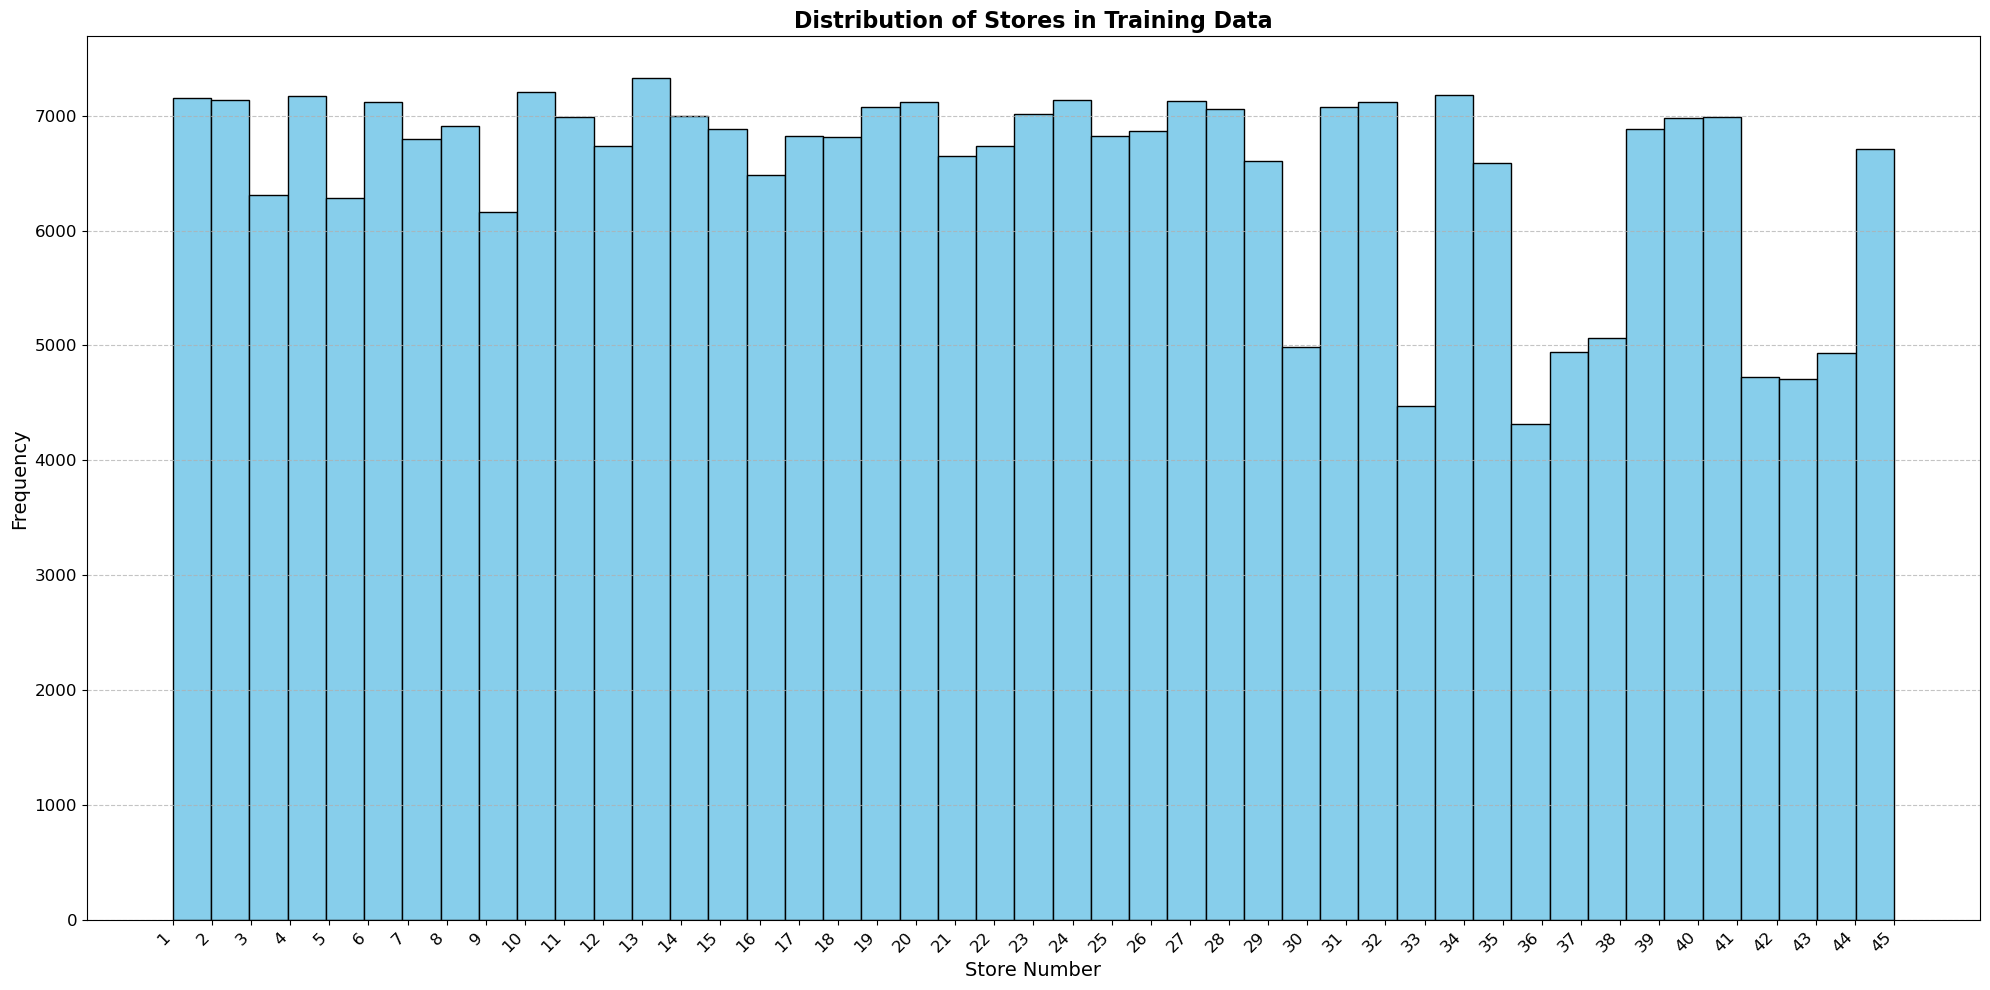

In [64]:
# Univariate Analysis - analyzing a single variable at a time
plt.figure(figsize=(20, 10))
plt.hist(combined_data_train['Store'], bins=combined_data_train['Store'].nunique(), edgecolor='black', color='skyblue') 
plt.title('Distribution of Stores in Training Data', fontsize=16, fontweight='bold') 
plt.xlabel('Store Number', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12, rotation=45, ha='right') 
plt.yticks(fontsize=12)
plt.grid(axis='y', alpha=0.75, linestyle='--')  
plt.tight_layout() 
plt.show()

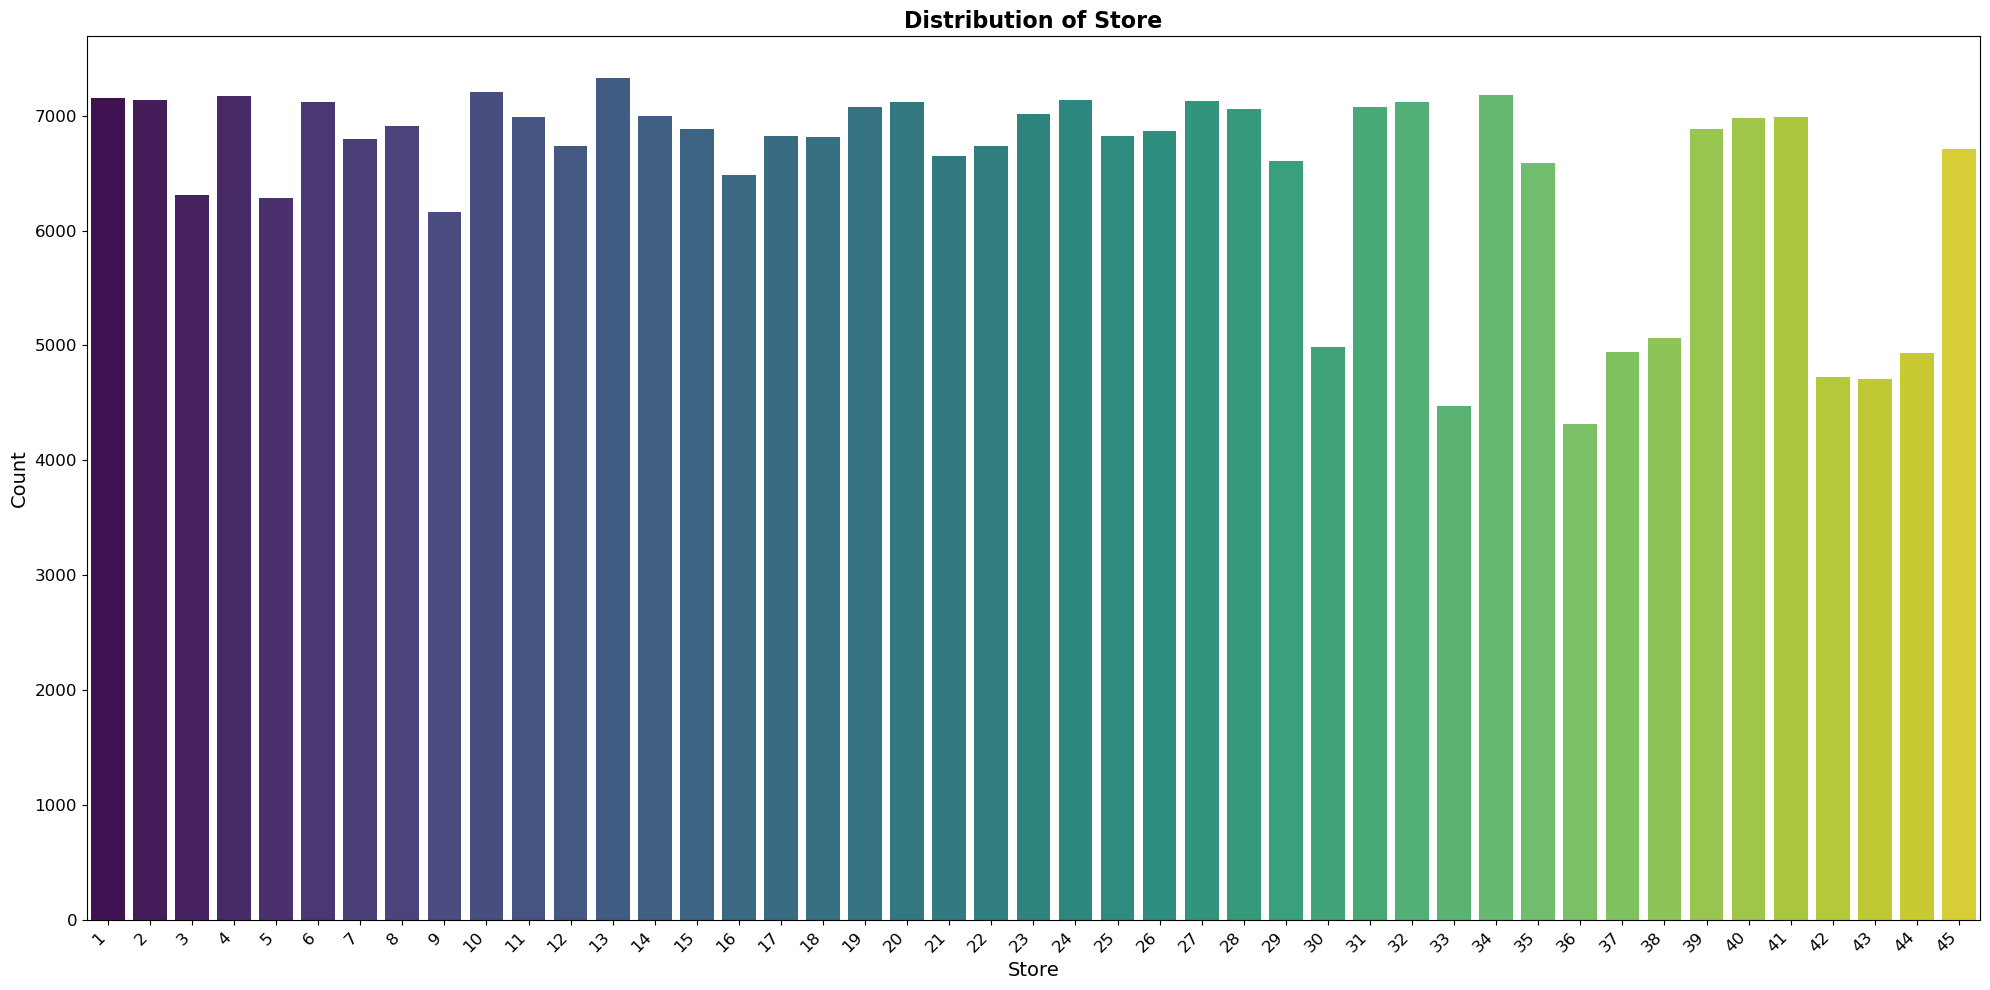

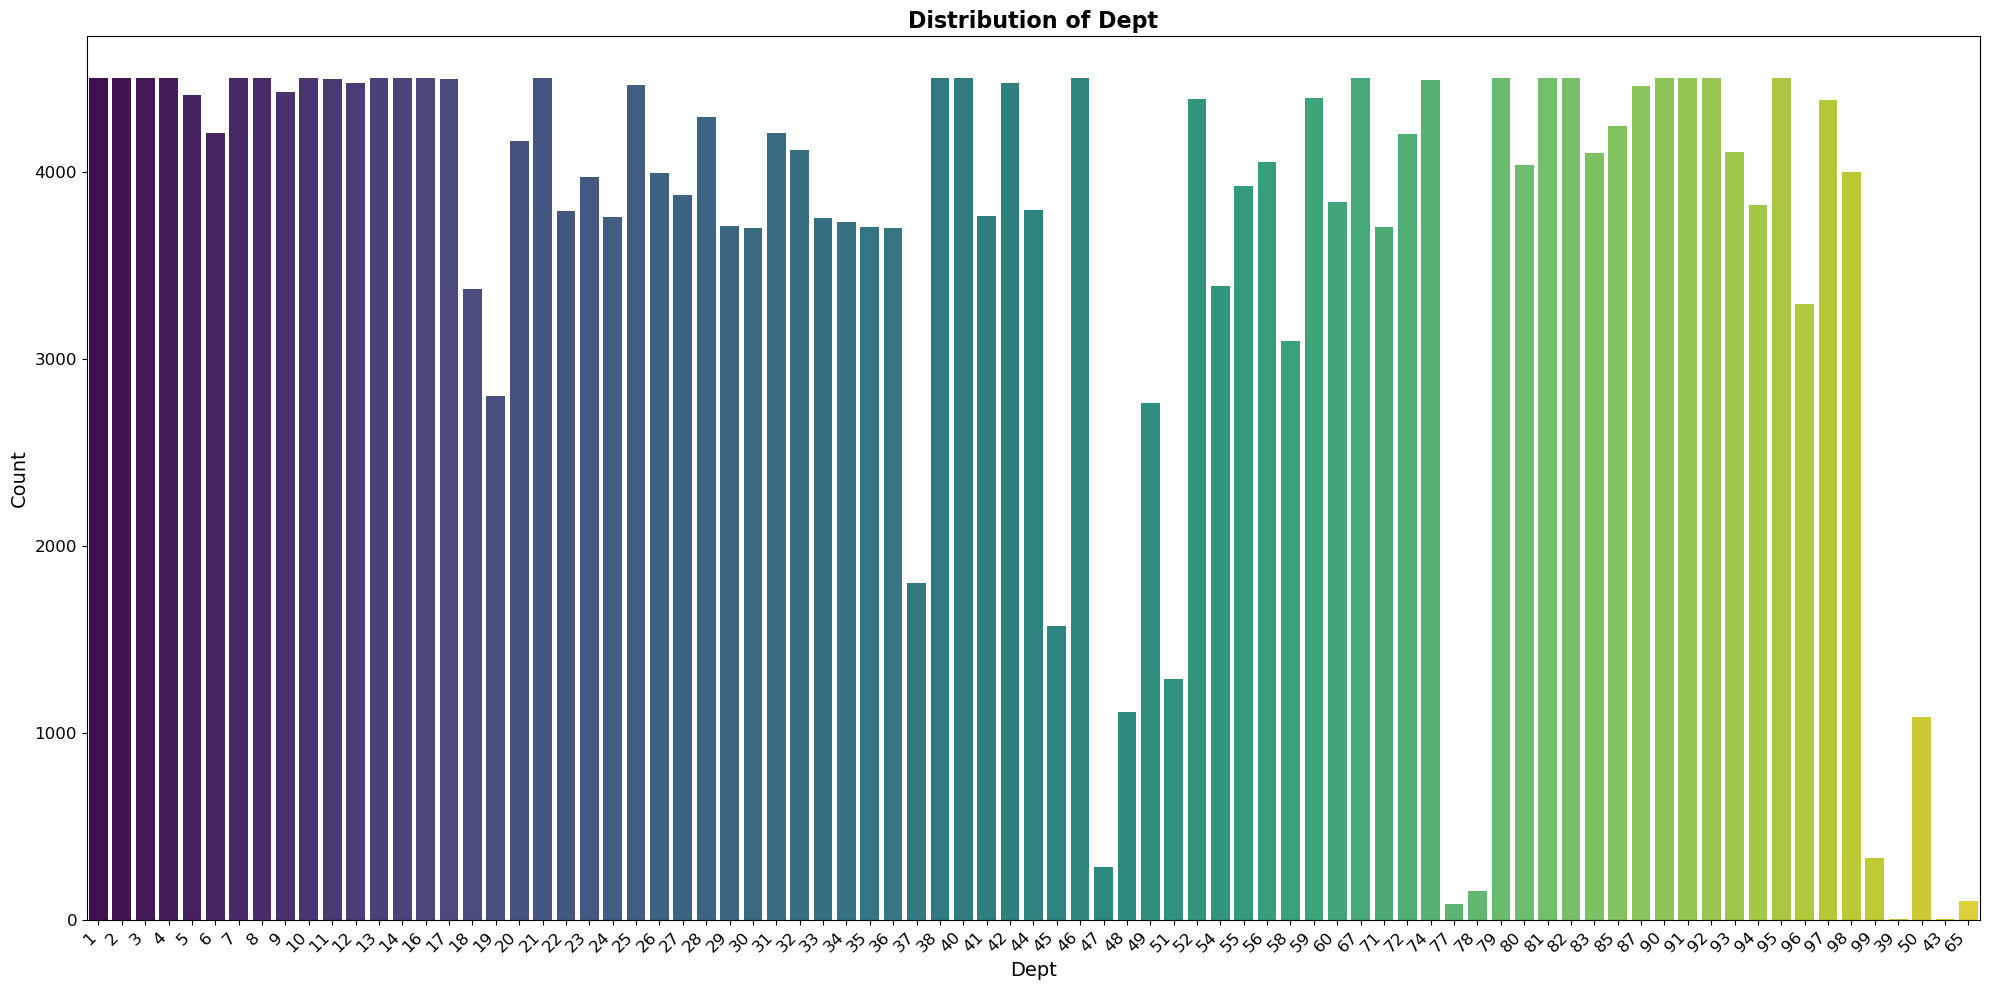

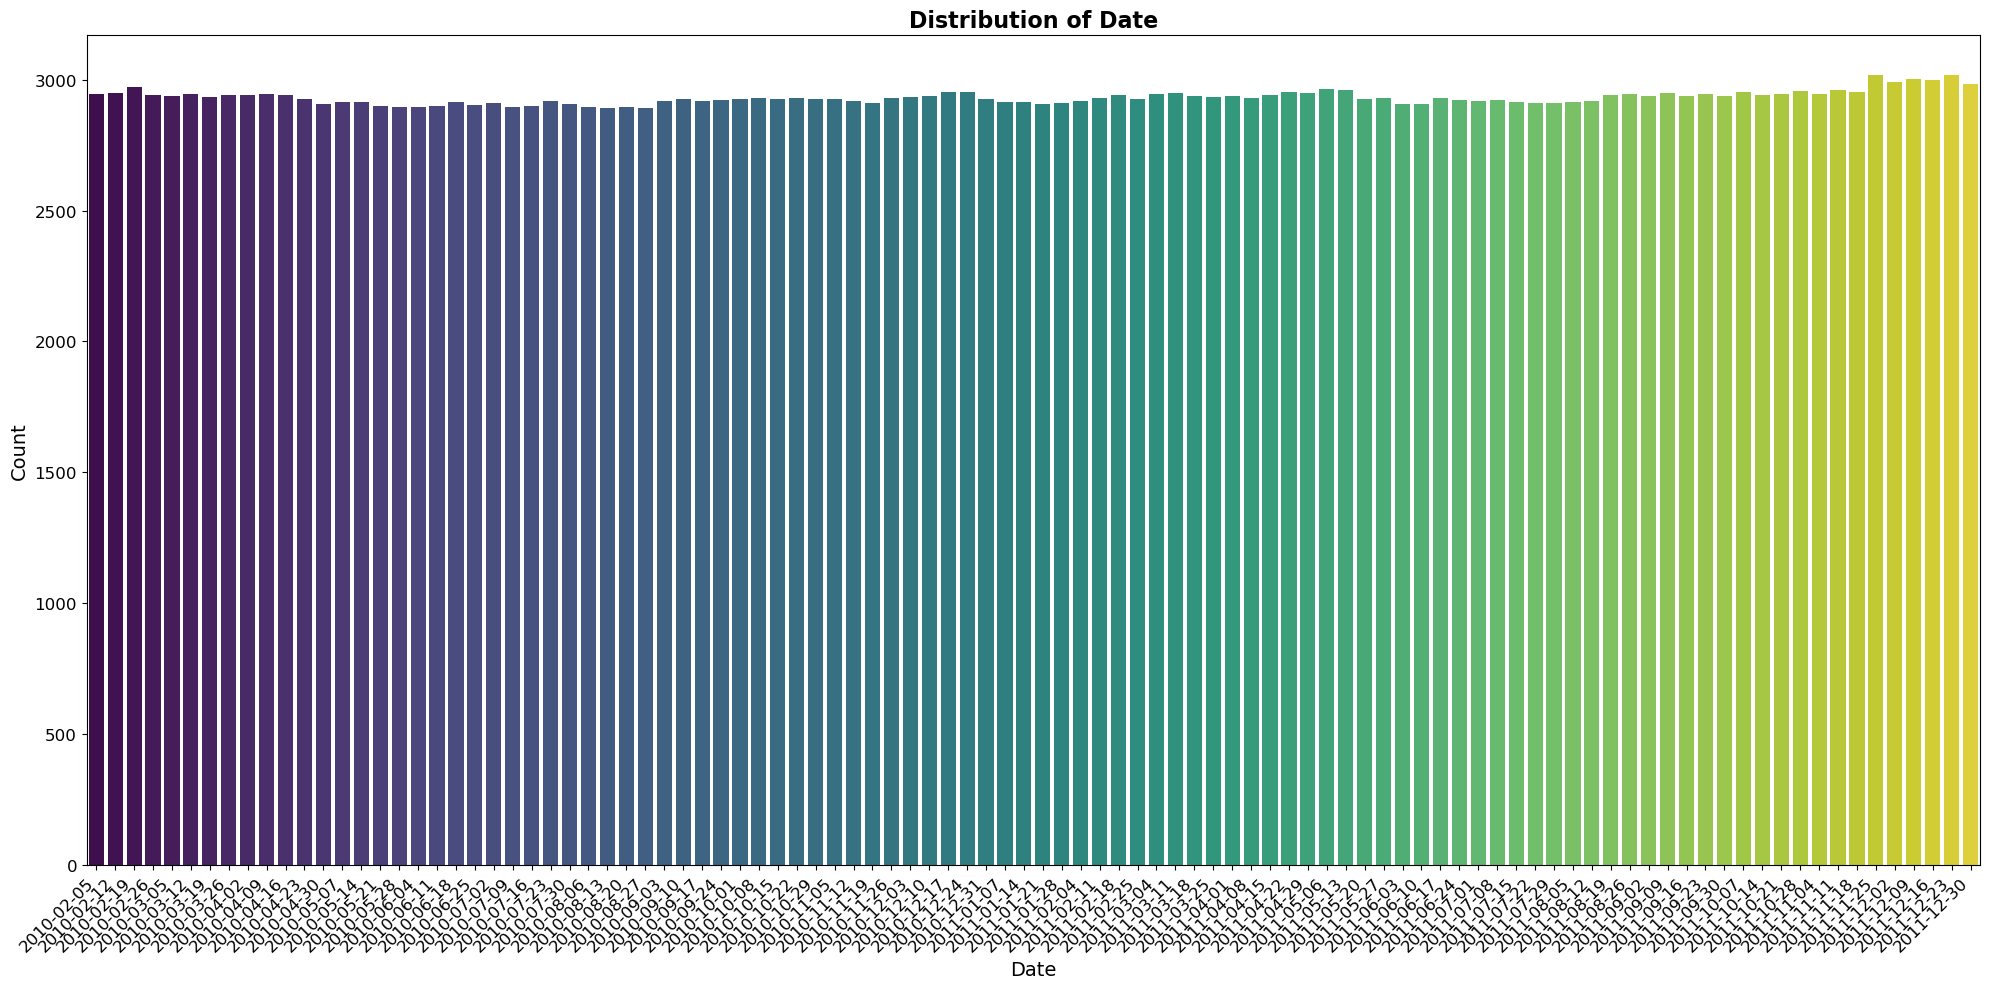

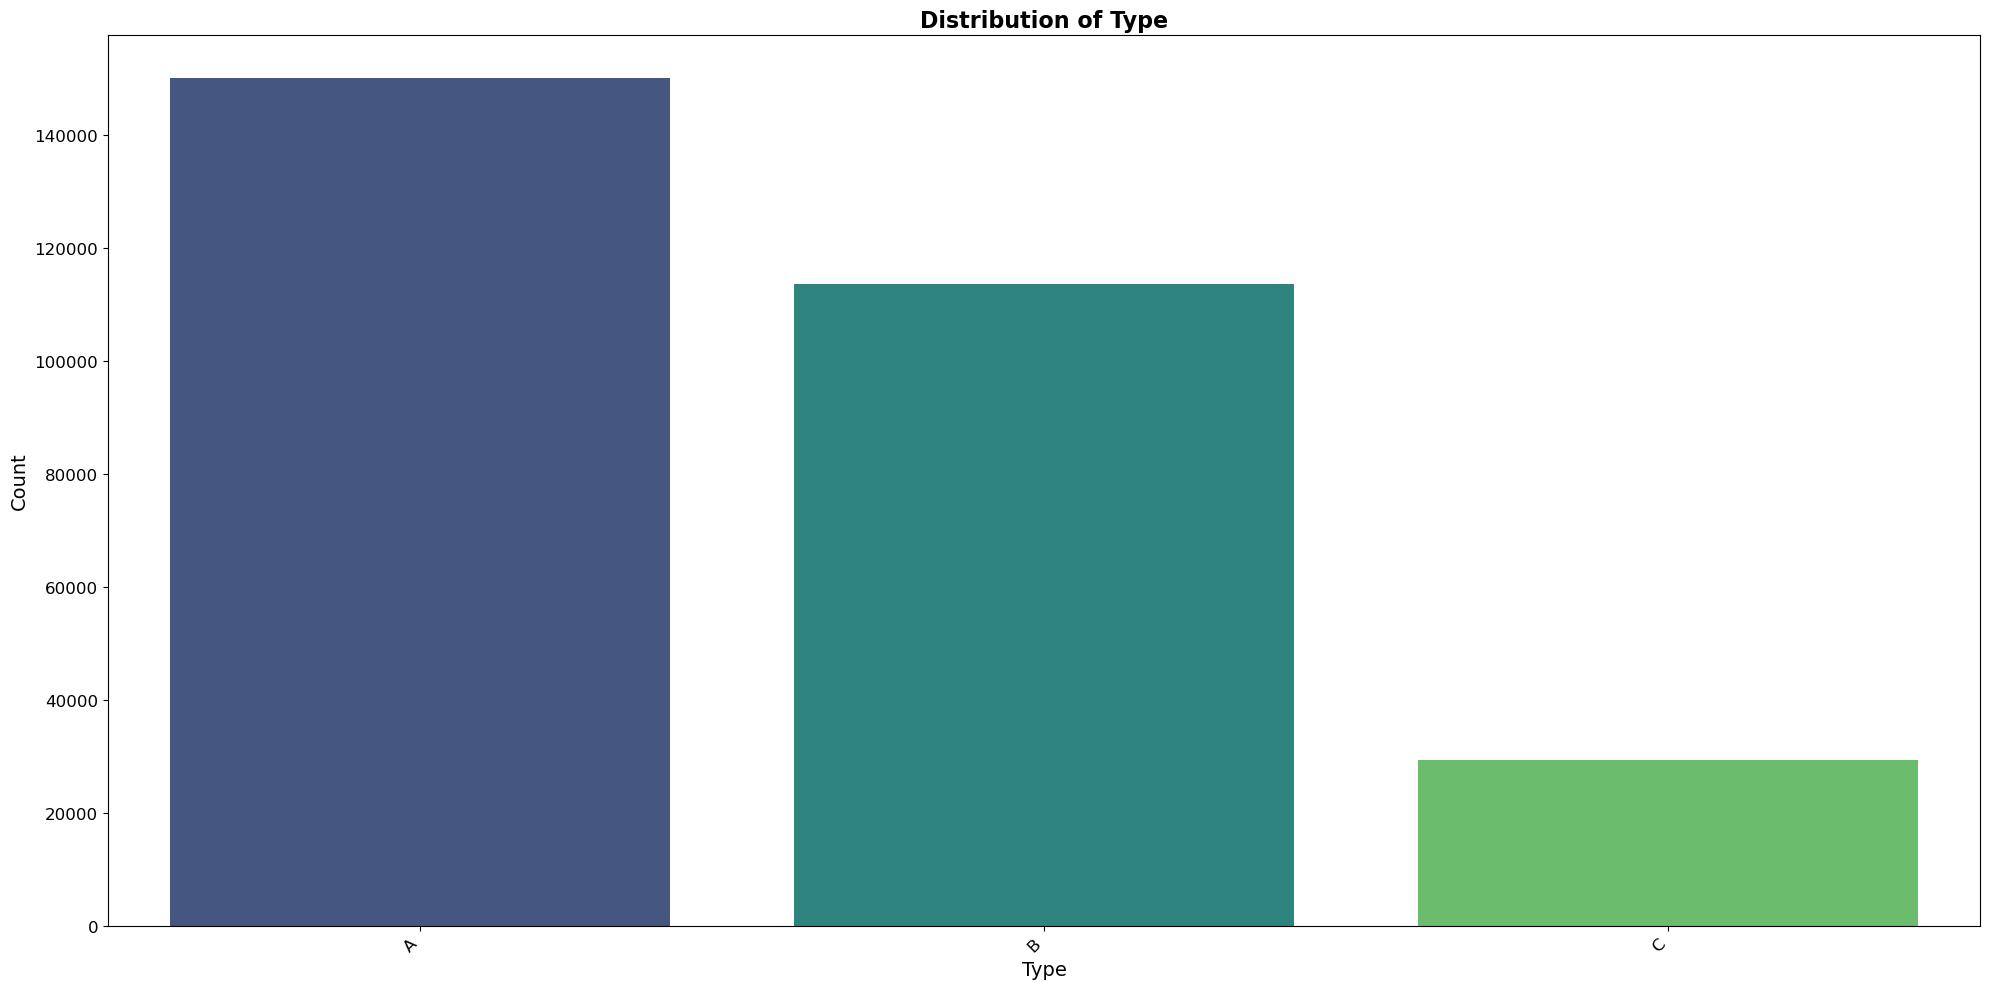

In [66]:
# Univariate analysis of categorical variables
cat_columns = combined_data_train.select_dtypes(object).columns.tolist()

for var in cat_columns:
    plt.figure(figsize = (20,10))
    sns.countplot(x=combined_data_train[var], palette="viridis") # Use seaborn countplot and a color palette
    plt.title(f'Distribution of {var}', fontsize=16, fontweight='bold') # Improved title
    plt.xlabel(var, fontsize=14) # Add x-axis label
    plt.ylabel('Count', fontsize=14) # Add y-axis label
    plt.xticks(fontsize=12, rotation=45, ha='right') # Rotate x-axis labels
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.show()

In [67]:
# Preparing the data for further analysis by categorizing numerical features into markdown and non-markdown groups
num_columns = combined_data_train.select_dtypes(np.number).columns.tolist()
mark_columns = [x for x in num_columns if 'Mark' in x]
mark_columns
nonmark_columns = list(set(num_columns).difference(set(mark_columns)))
nonmark_columns

['Unemployment',
 'Size',
 'Temperature',
 'IsHoliday',
 'CPI',
 'Fuel_Price',
 'Weekly_Sales']

<Axes: >

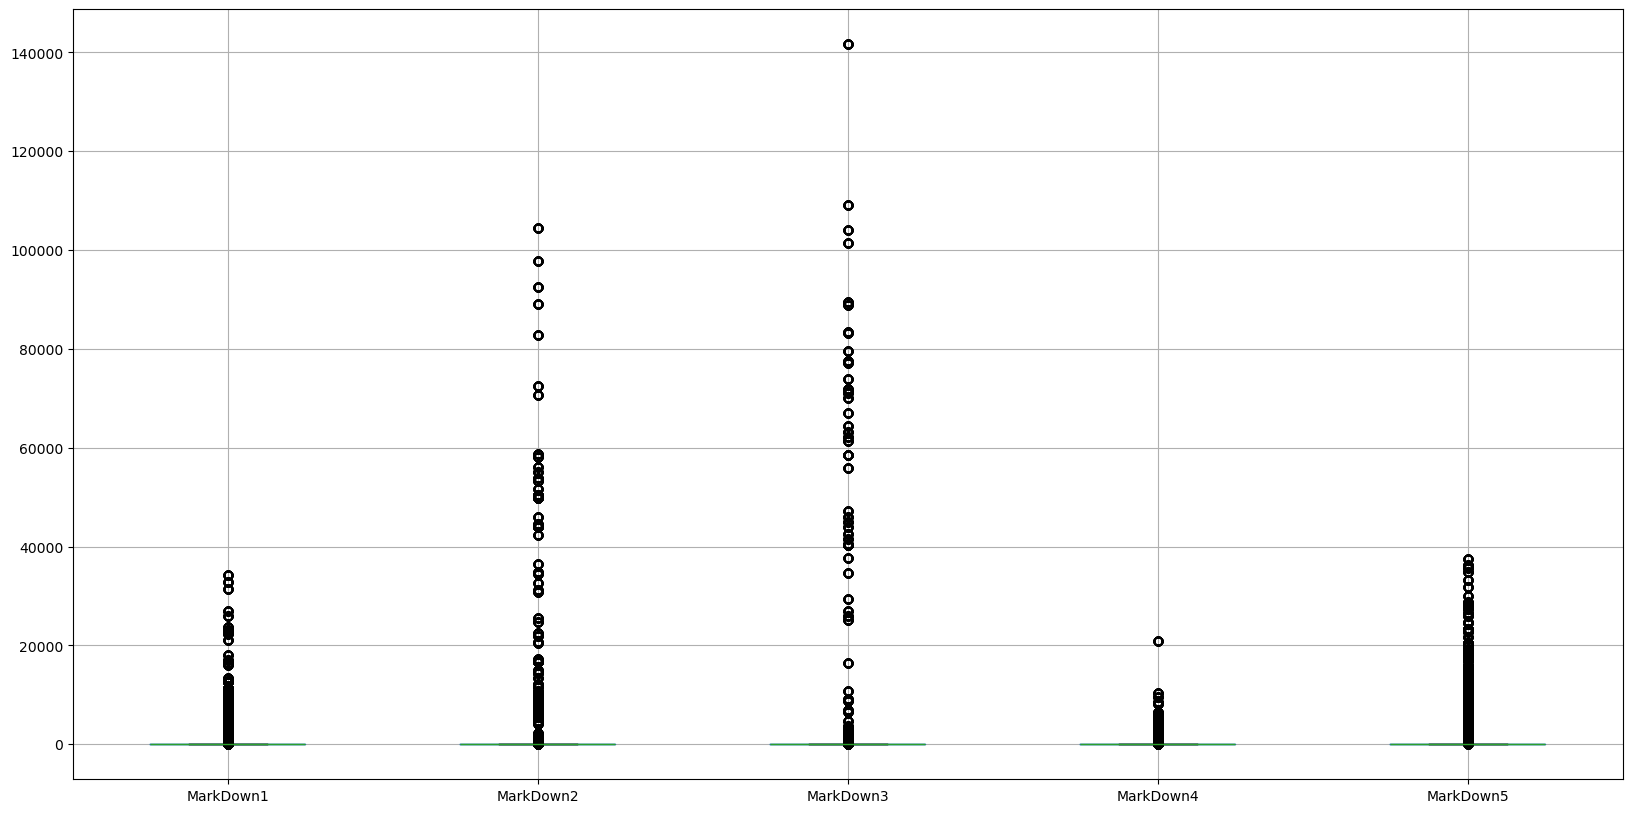

In [68]:
# creating a box plot to visualize distribution of numerical columns in the training dataset with markdowns.
combined_data_train.boxplot(column = mark_columns, figsize=(20,10))

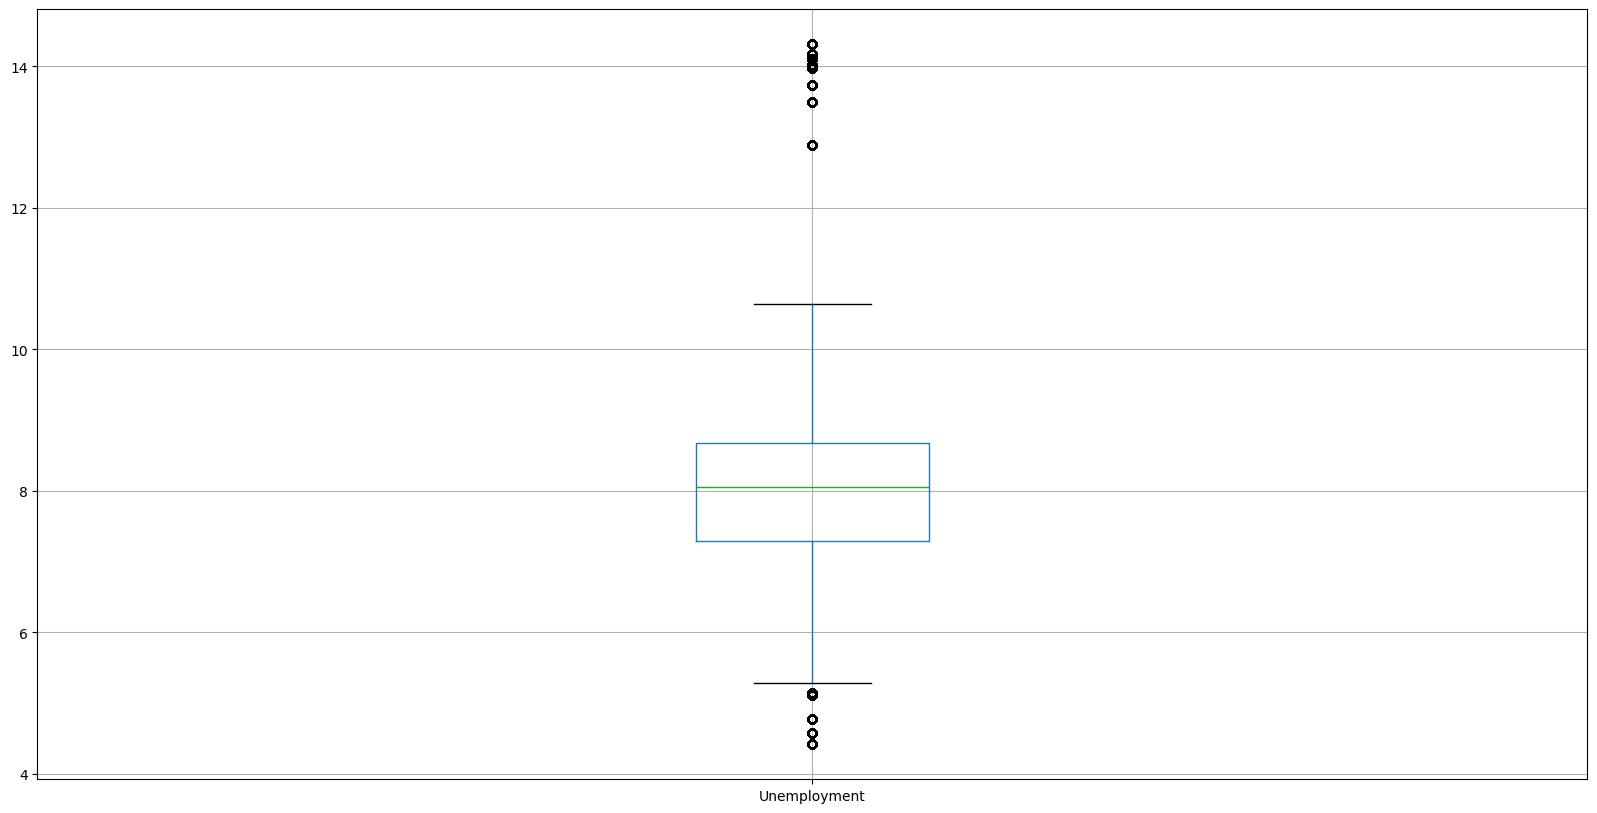

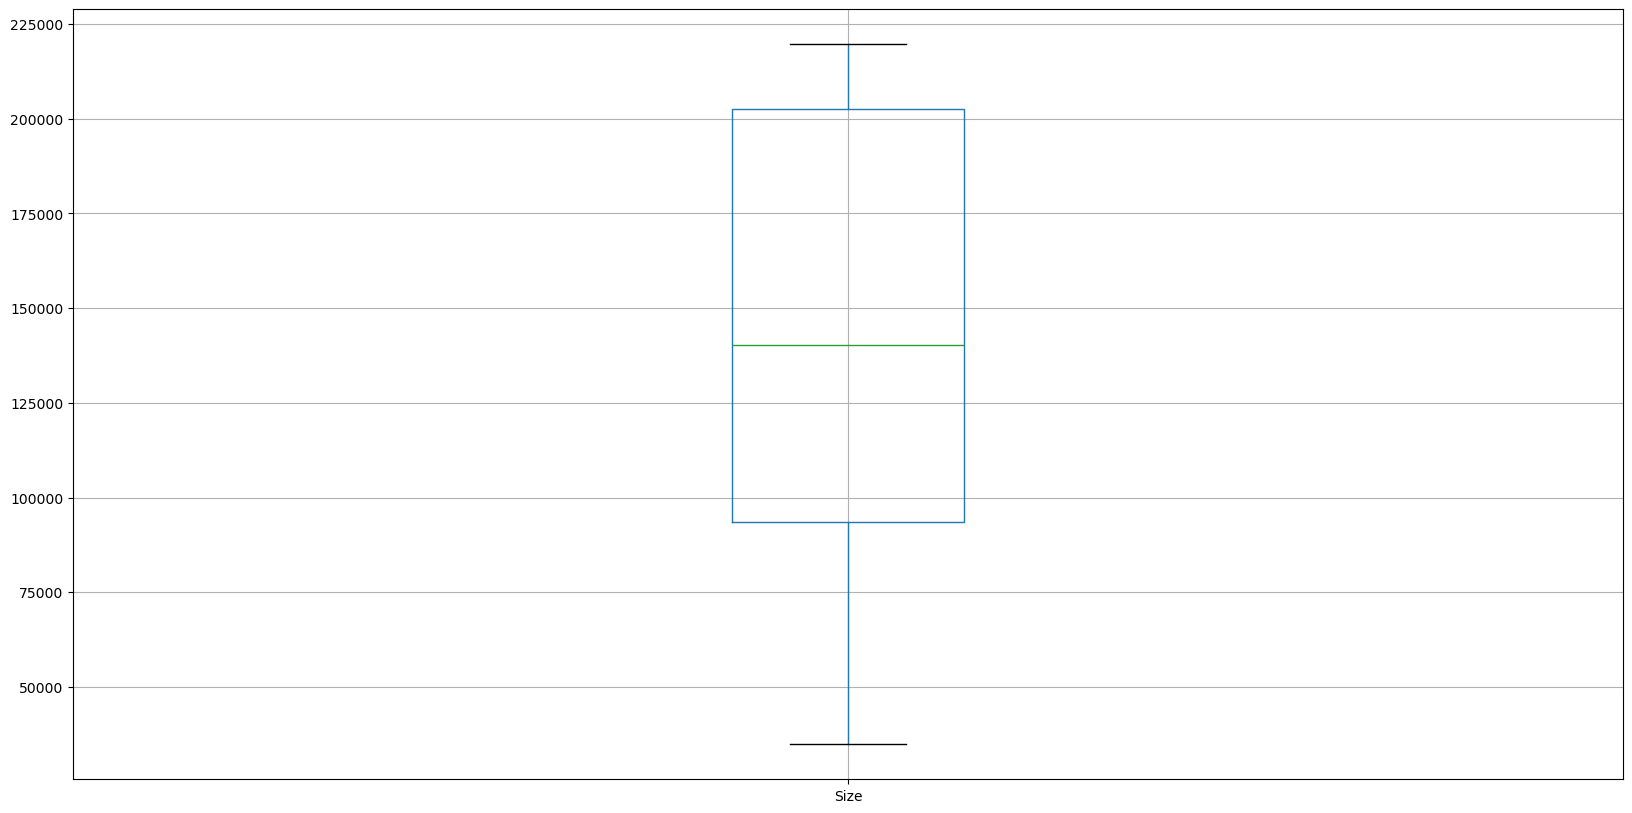

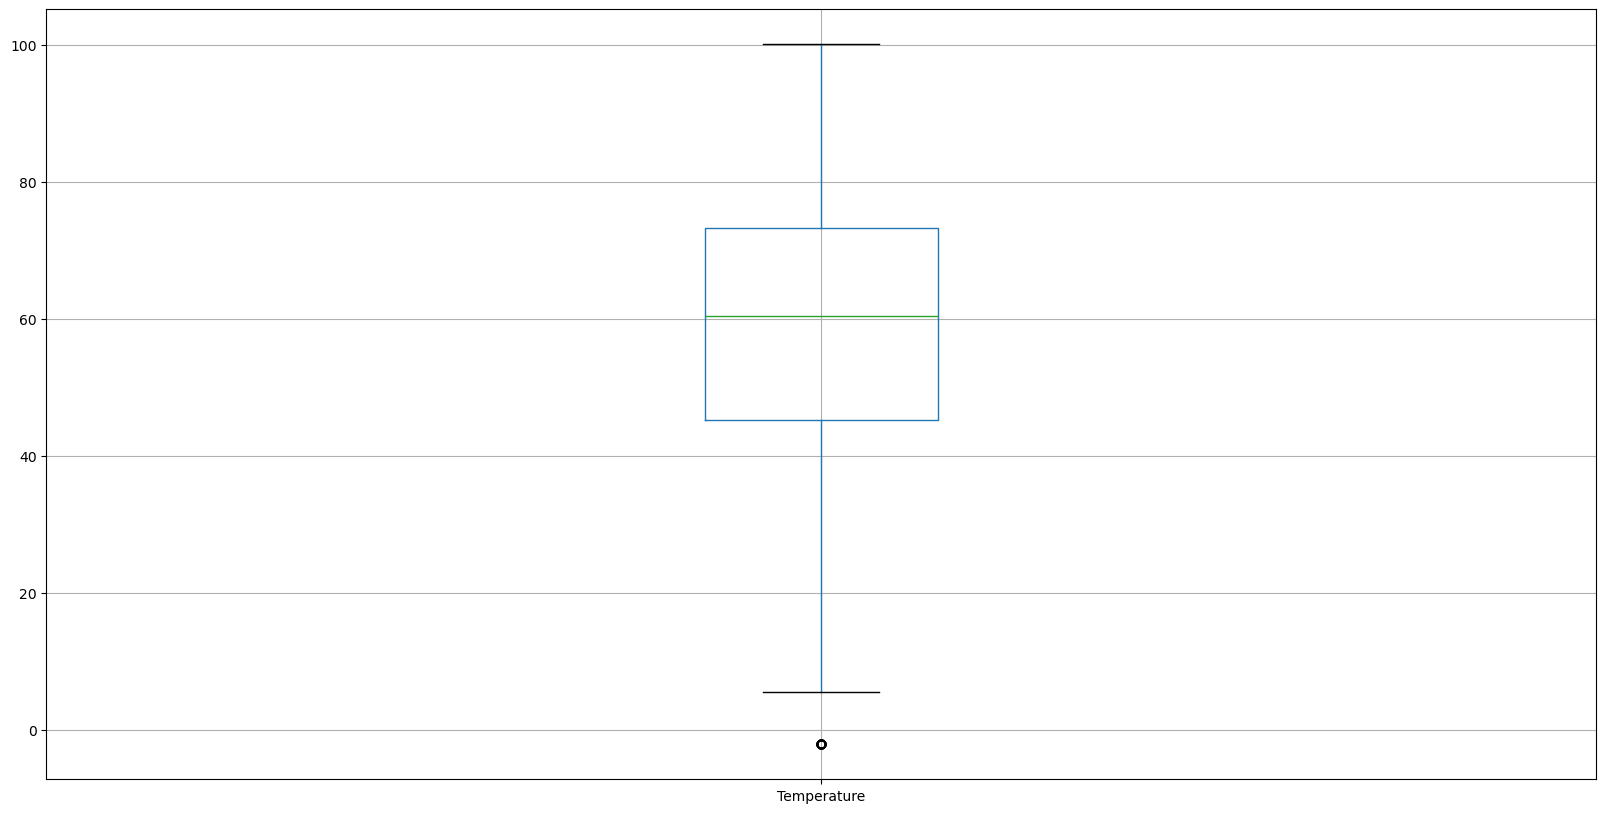

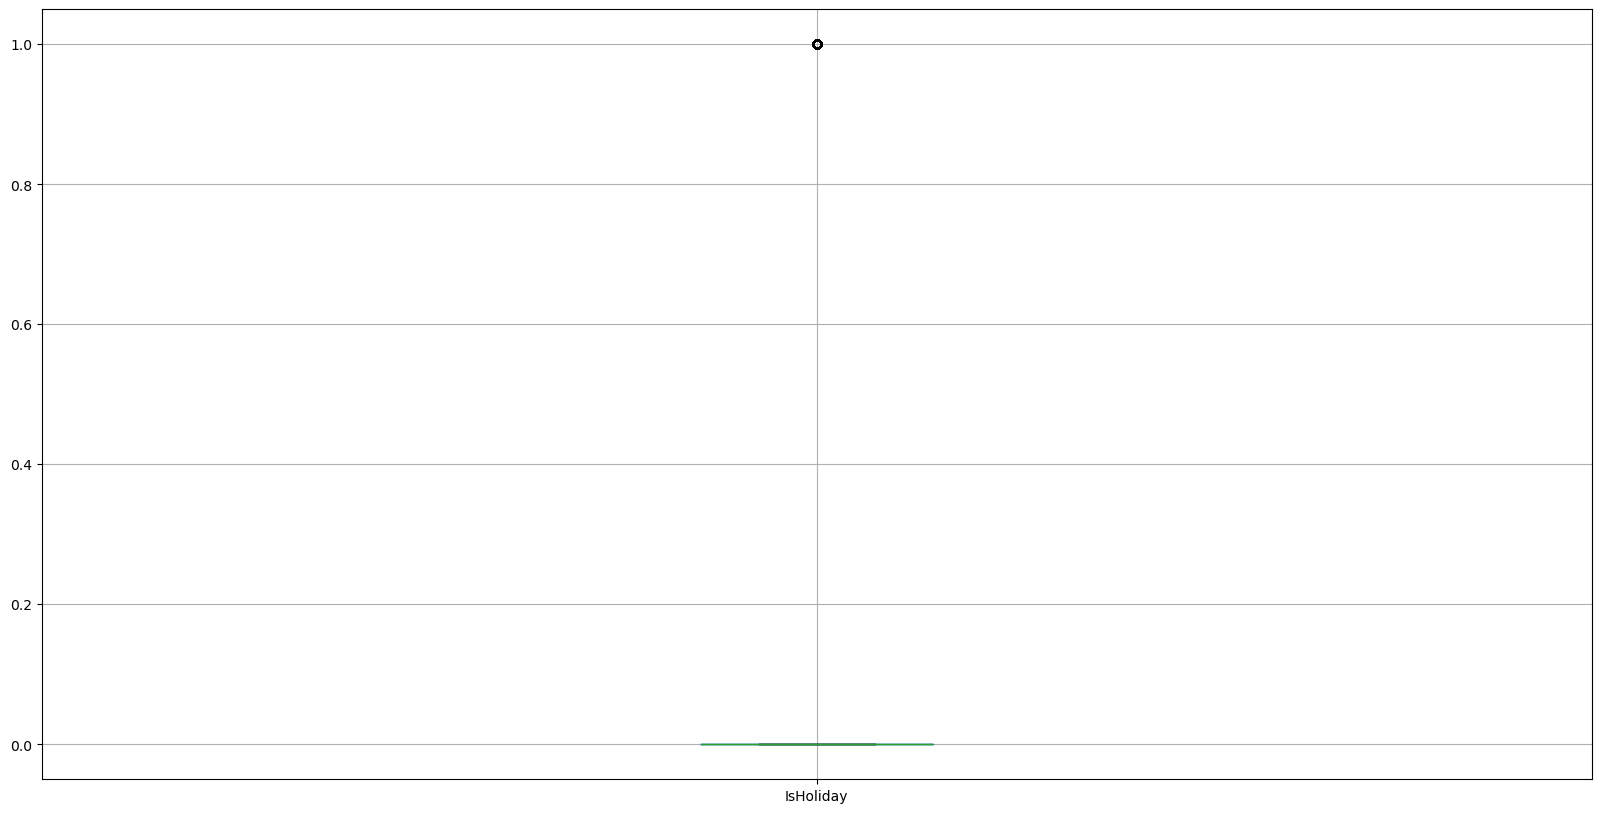

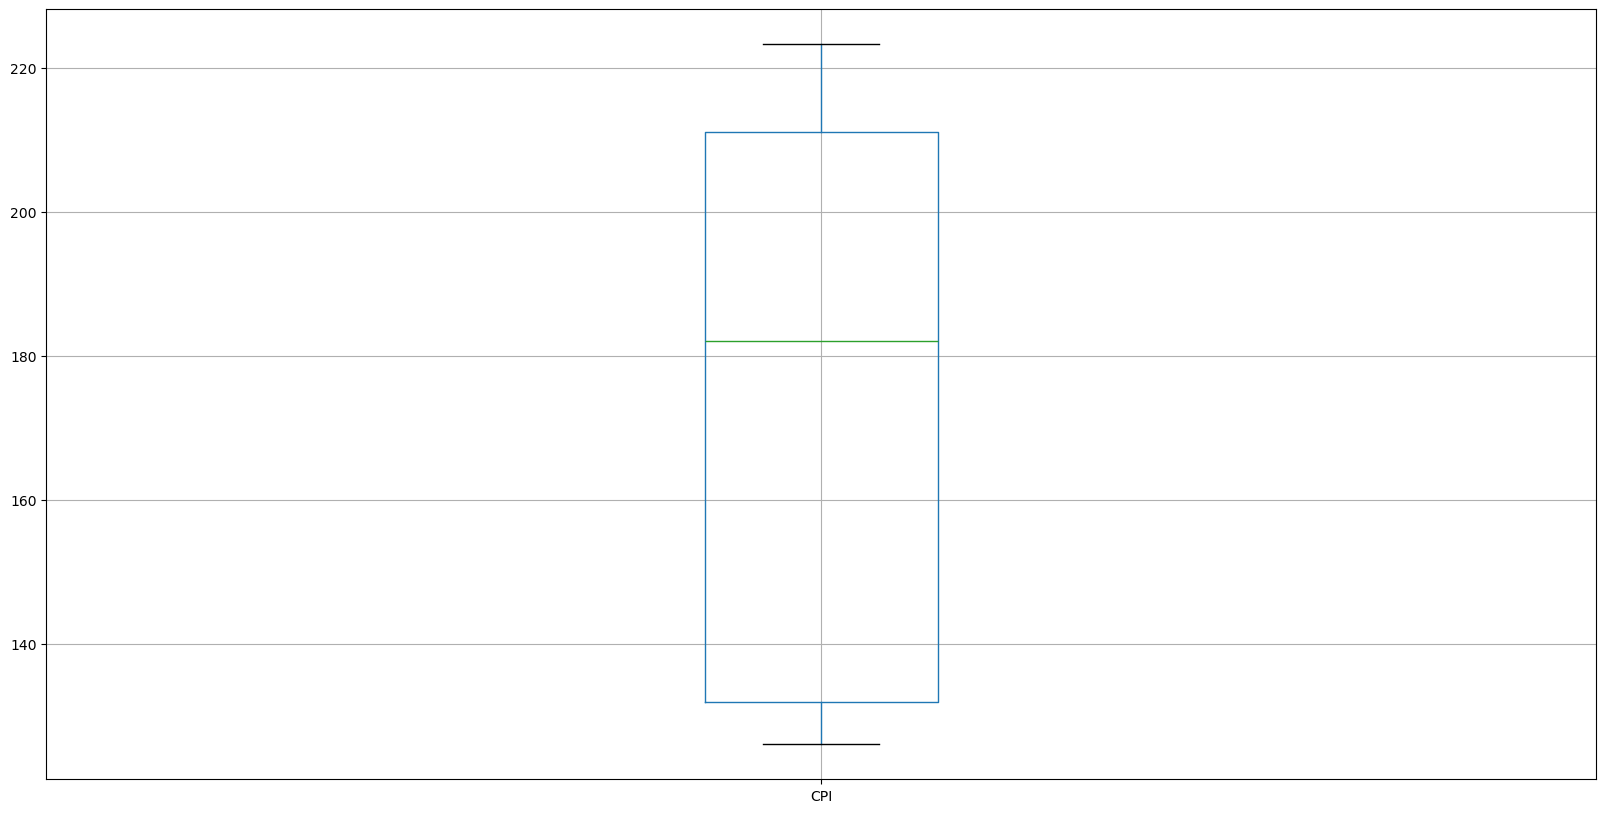

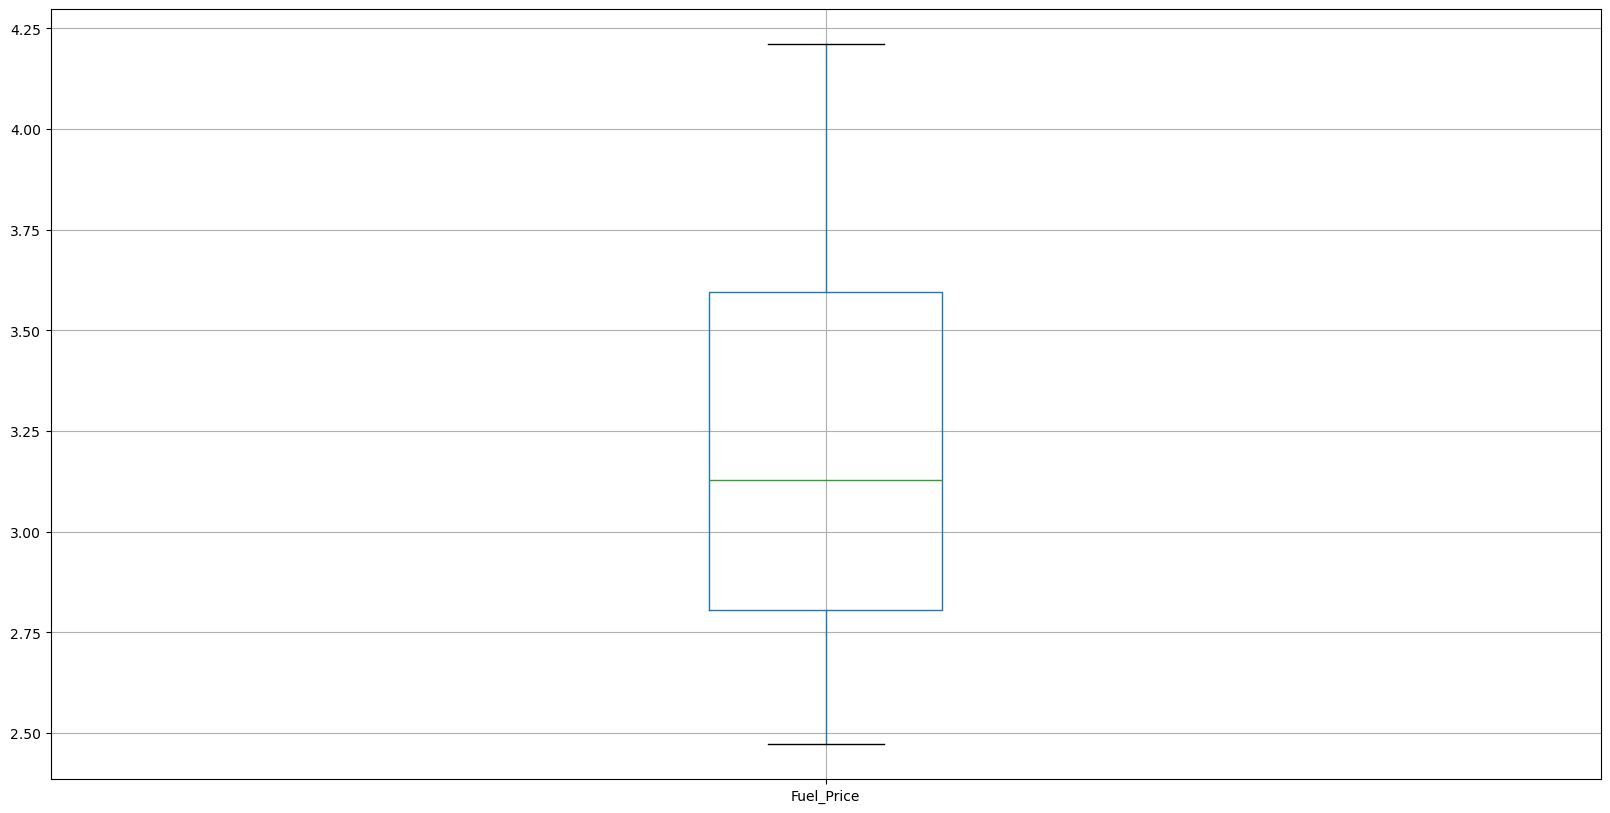

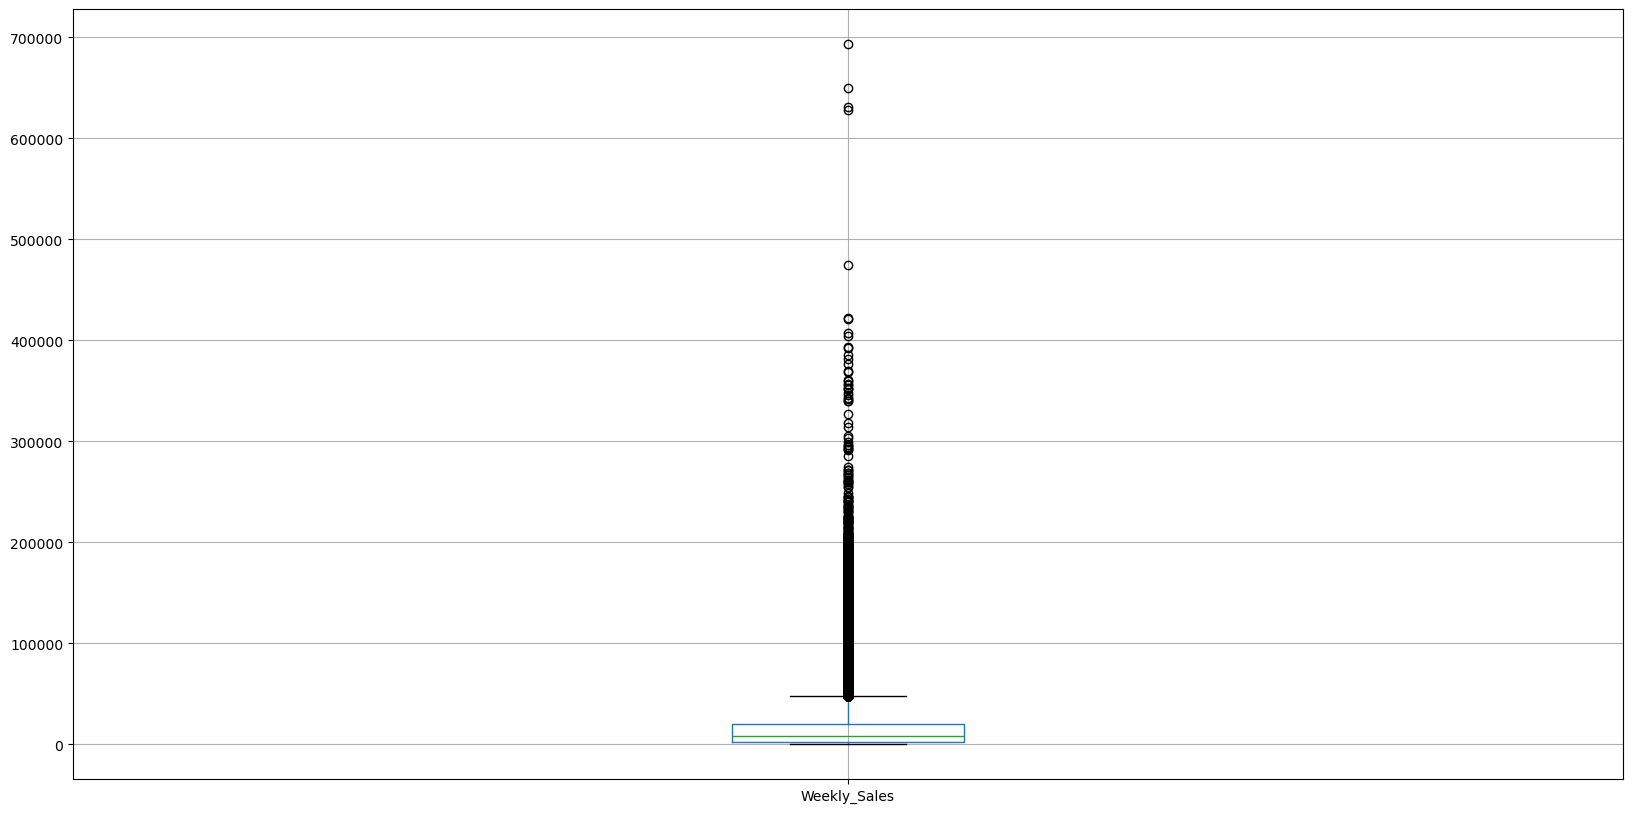

In [69]:
# Creating box plots for numerical features (columns) in the training dataset excluding markdowns.
for var in nonmark_columns:
    combined_data_train.boxplot(column = var, figsize=(20,10))
    plt.show()

### Bivariate Analysis

In [73]:
# Creating a new DataFrame that contains only numeric columns from the original combined_df_train DataFrame\
# excluding the target variable (Weekly_Sales)
train_num = combined_data_train[num_columns]
train_num = train_num.drop(['Weekly_Sales'], axis=1)
train_num.head()

IsHoliday  Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  \
0          0        42.31       2.572        0.0        0.0        0.0   
1          1        38.51       2.548        0.0        0.0        0.0   
2          0        39.93       2.514        0.0        0.0        0.0   
3          0        46.63       2.561        0.0        0.0        0.0   
4          0        46.50       2.625        0.0        0.0        0.0   

   MarkDown4  MarkDown5         CPI  Unemployment    Size  
0        0.0        0.0  211.096358         8.106  151315  
1        0.0        0.0  211.242170         8.106  151315  
2        0.0        0.0  211.289143         8.106  151315  
3        0.0        0.0  211.319643         8.106  151315  
4        0.0        0.0  211.350143         8.106  151315

In [74]:
# Checking the highly correlated variables
corr_values = train_num.corr().unstack().reset_index()
print(corr_values.shape)
corr_values2 = corr_values[corr_values['level_0'] > corr_values['level_1'] ]
print(corr_values2.shape)
corr_values2.columns = ['var1', 'var2', 'corr_value']
corr_values2['corr_abs'] = corr_values2['corr_value'].abs()
corr_values2.sort_values( 'corr_abs', ascending=False, inplace=True)
corr_values2.head(10)

(121, 3)
(55, 3)


var1       var2  corr_value  corr_abs
69      MarkDown4  MarkDown1    0.764146  0.764146
83      MarkDown5  MarkDown4    0.673759  0.673759
80      MarkDown5  MarkDown1    0.573937  0.573937
47      MarkDown2  MarkDown1    0.364552  0.364552
107  Unemployment        CPI   -0.298205  0.298205
55      MarkDown3  IsHoliday    0.296824  0.296824
44      MarkDown2  IsHoliday    0.272442  0.272442
70      MarkDown4  MarkDown2    0.232324  0.232324
30     Fuel_Price        CPI   -0.180454  0.180454
11    Temperature  IsHoliday   -0.178936  0.178936

<Axes: >

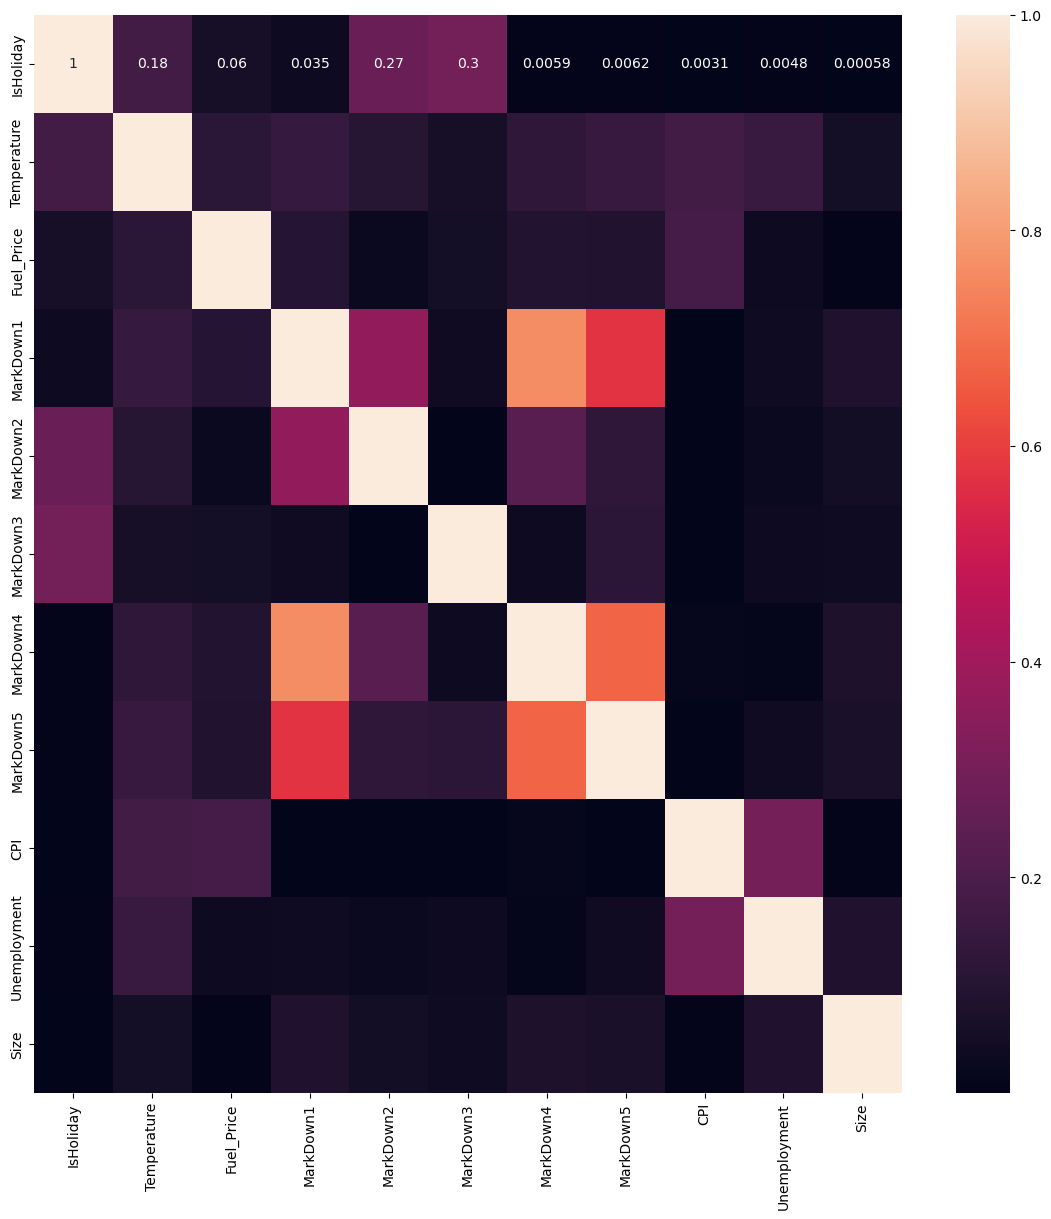

In [76]:
# Creating a heat map to see the degree of correlation visually
plt.figure(figsize=(14, 14))
vg_corr = train_num.corr().abs()
sns.heatmap(vg_corr, xticklabels = vg_corr.columns.values,yticklabels = vg_corr.columns.values, annot = True)

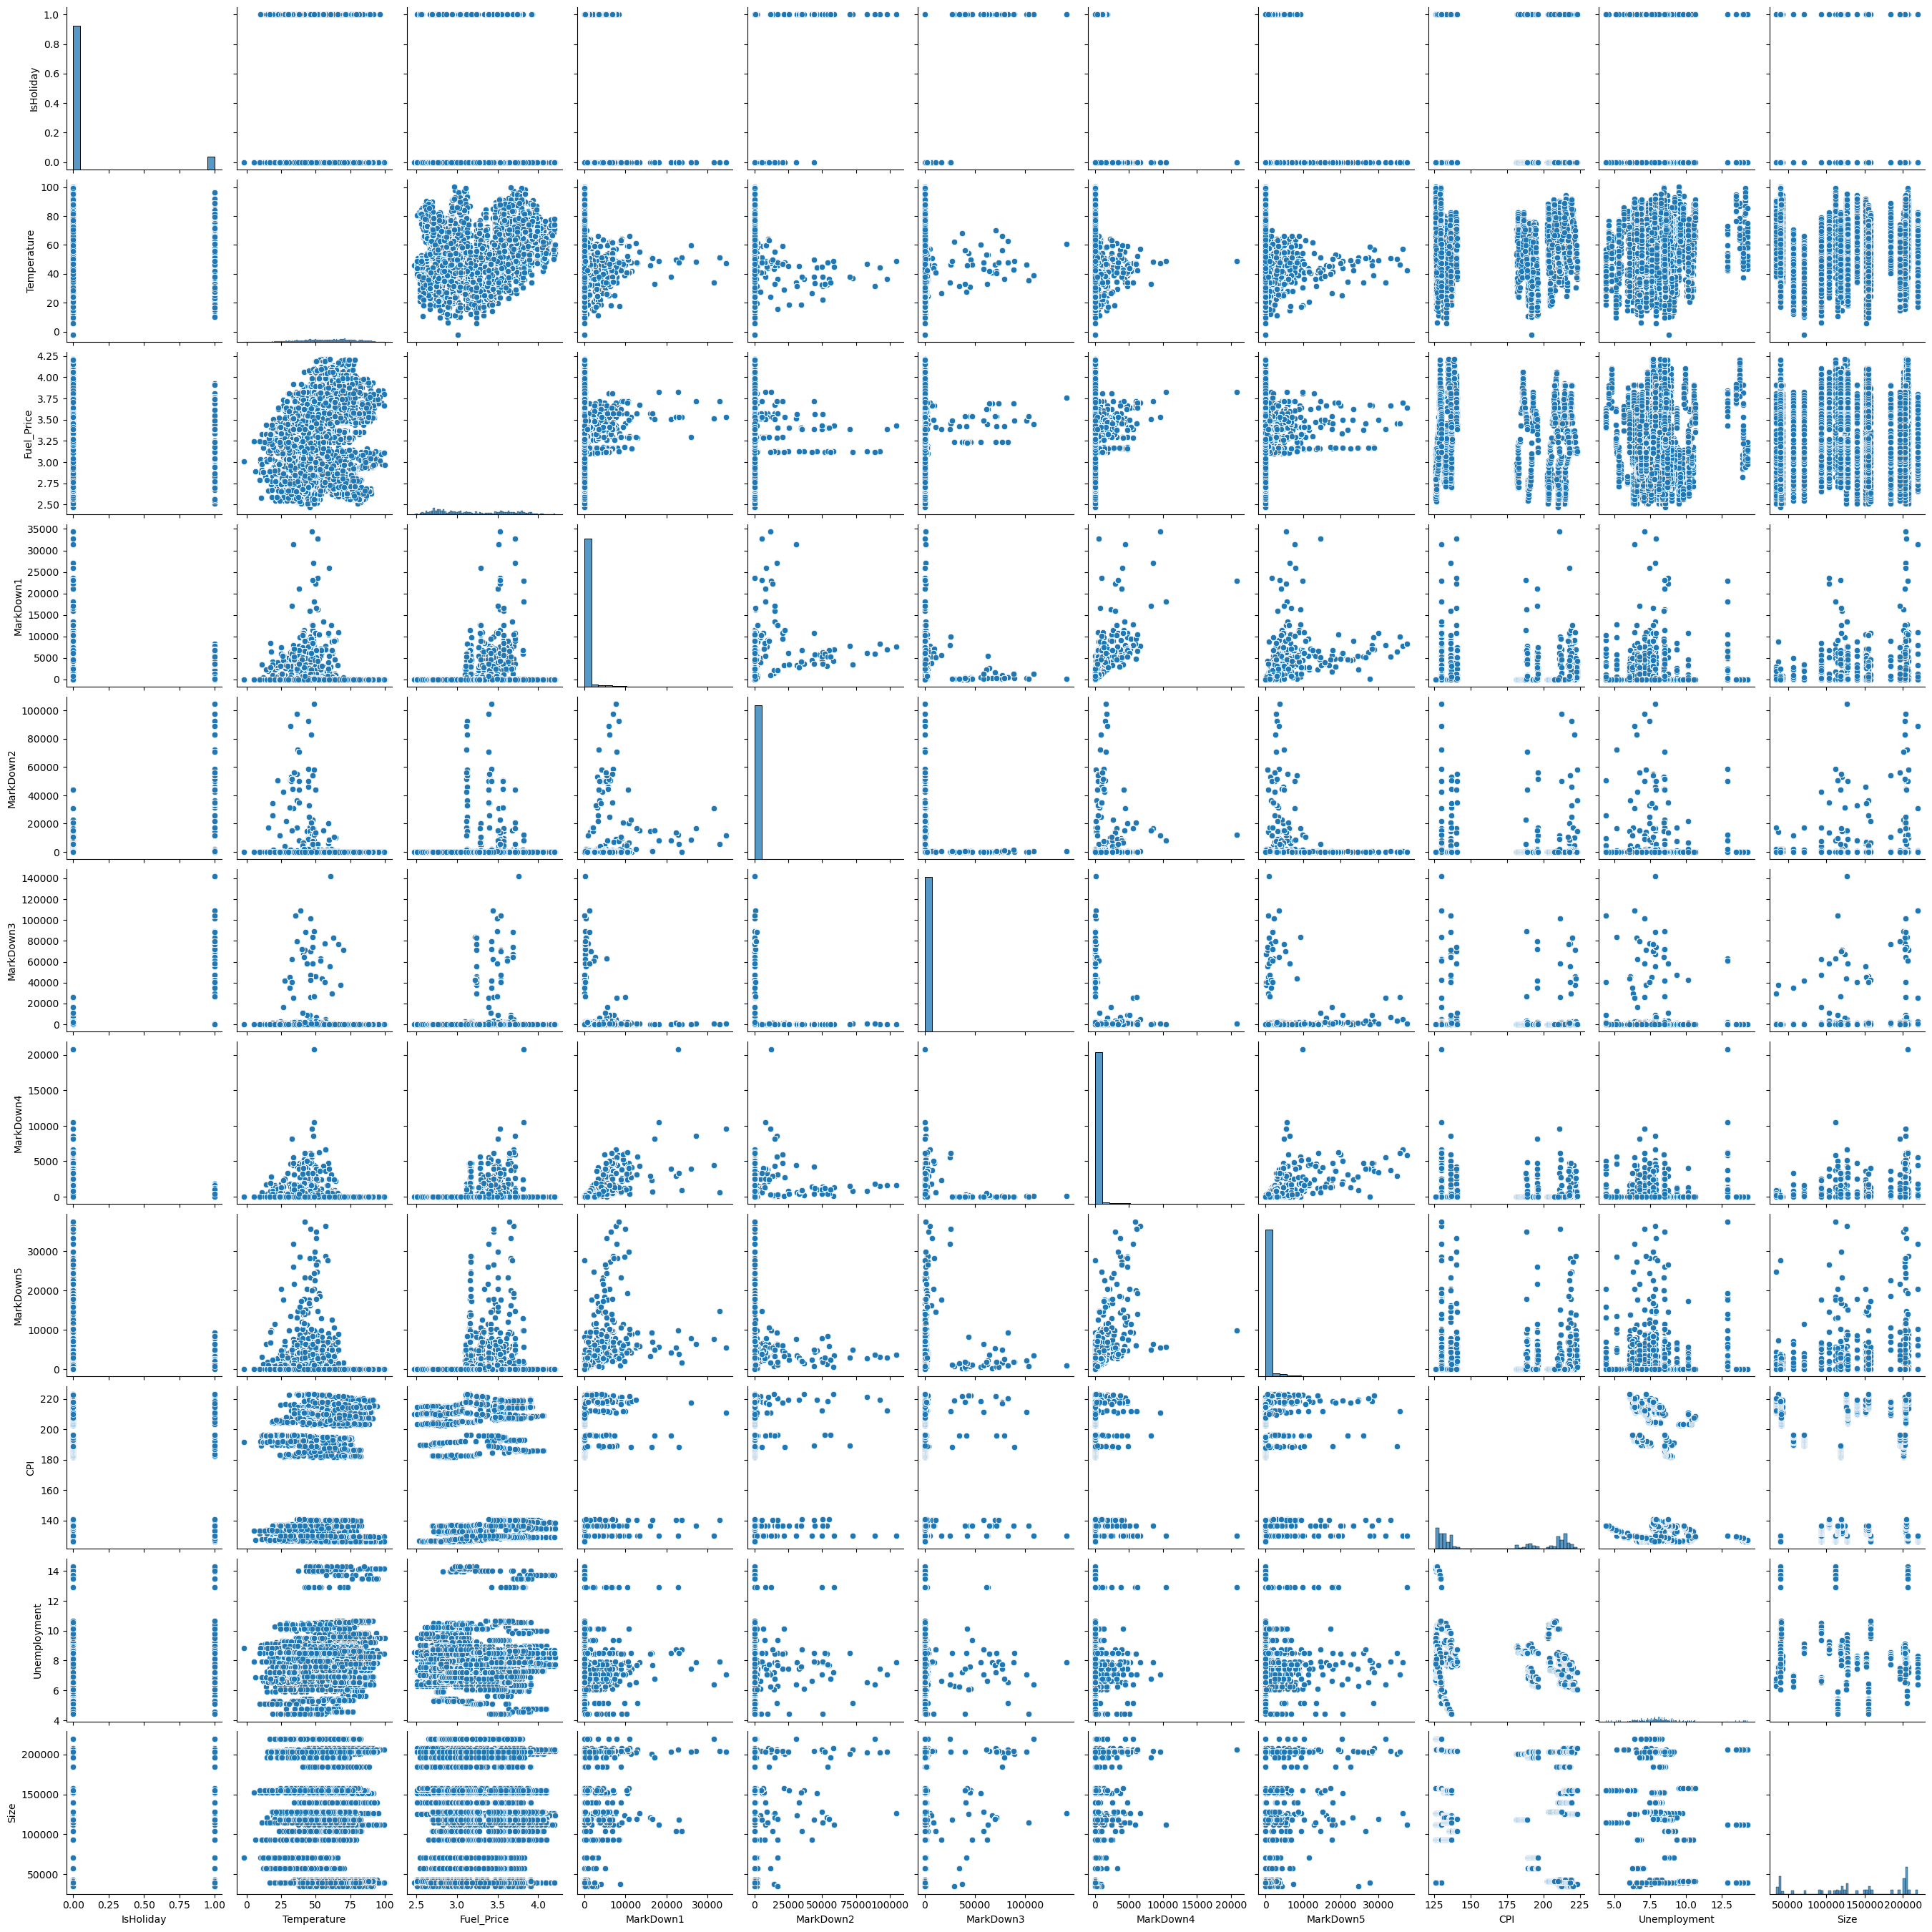

In [77]:
# Plotting each numeric predictor against the other to visually explore relationships between them.
sns.pairplot(train_num)

In [78]:
# Checking which numeric features have the strongest correlation with weekly sales
all_corr = combined_data_train.select_dtypes(include=np.number).corr().unstack().reset_index() # Selecting only numeric columns for correlation calculation
print(all_corr.shape)
corr_table = all_corr[all_corr['level_1'] =='Weekly_Sales' ]
corr_table = corr_table.loc[ (corr_table['level_0'] != 'Weekly_Sales') ]
print(corr_table.shape)
corr_table.columns = ['var1', 'var2', 'corr_value']
corr_table['corr_abs'] = corr_table['corr_value'].abs()
corr_table = corr_table.sort_values(by= ['corr_abs'], ascending = False )
corr_table

(144, 3)
(11, 3)


var1          var2  corr_value  corr_abs
132          Size  Weekly_Sales    0.242929  0.242929
72      MarkDown3  Weekly_Sales    0.044642  0.044642
96      MarkDown5  Weekly_Sales    0.038685  0.038685
48      MarkDown1  Weekly_Sales    0.035576  0.035576
84      MarkDown4  Weekly_Sales    0.031970  0.031970
120  Unemployment  Weekly_Sales   -0.025631  0.025631
108           CPI  Weekly_Sales   -0.021871  0.021871
60      MarkDown2  Weekly_Sales    0.016028  0.016028
12      IsHoliday  Weekly_Sales    0.013925  0.013925
24    Temperature  Weekly_Sales   -0.007911  0.007911
36     Fuel_Price  Weekly_Sales    0.004312  0.004312

In [79]:
# Extracting the week number and the year from the existing 'Date2' column
combined_data_train['week_number'] = combined_data_train['Date2'].dt.isocalendar().week
combined_data_train['year_number'] = combined_data_train['Date2'].dt.year

In [80]:
# Checking the holiday weeks with highest total sales
temper = combined_data_train.groupby('Date', as_index=False).agg({'Weekly_Sales':'sum'})
print(temper['Weekly_Sales'].mean())
temper = combined_data_train.groupby(['Date', 'IsHoliday', 'week_number', 'year_number'], as_index=False).agg({'Weekly_Sales':'sum'})
temper.loc[temper['IsHoliday'] == 1].sort_values(by = 'Weekly_Sales', ascending=False)

47371515.0689


Date  IsHoliday  week_number  year_number  Weekly_Sales
94  2011-11-25          1           47         2011   66593835.85
42  2010-11-26          1           47         2010   65821216.26
1   2010-02-12          1            6         2010   48336800.10
53  2011-02-11          1            6         2011   47336816.90
83  2011-09-09          1           36         2011   46763760.42
99  2011-12-30          1           52         2011   46044300.91
31  2010-09-10          1           36         2010   45635418.66
47  2010-12-31          1           52         2010   40434740.42

In [81]:
# Identifying and displaying the top 20 weeks with the highest total sales.
temper.sort_values(by = 'Weekly_Sales', ascending=False).head(20)

Date  IsHoliday  week_number  year_number  Weekly_Sales
46  2010-12-24          0           51         2010   80931586.20
98  2011-12-23          0           51         2011   76999773.57
94  2011-11-25          1           47         2011   66593835.85
42  2010-11-26          1           47         2010   65821216.26
45  2010-12-17          0           50         2010   61821317.85
97  2011-12-16          0           50         2011   60086723.16
44  2010-12-10          0           49         2010   55667840.03
96  2011-12-09          0           49         2011   55561557.73
8   2010-04-02          0           13         2010   50424232.22
17  2010-06-04          0           22         2010   50188767.60
43  2010-12-03          0           48         2010   49910639.70
0   2010-02-05          0            5         2010   49750875.98
95  2011-12-02          0           48         2011   49390609.94
21  2010-07-02          0           26         2010   48917953.47
69  2011-06-03          0           22         2011   48772105.36
54  2011-02-18          0            7         2011   48716194.66
63  2011-04-22          0           16         2011   48676782.60
91  2011-11-04          0           44         2011   48655867.81
13  2010-05-07          0           18         2010   48503424.39
92  2011-11-11          0           45         2011   48474277.53

<Axes: title={'center': 'Total Juxtaposed Weekly Sales'}, xlabel='week_number', ylabel='Weekly_Sales'>

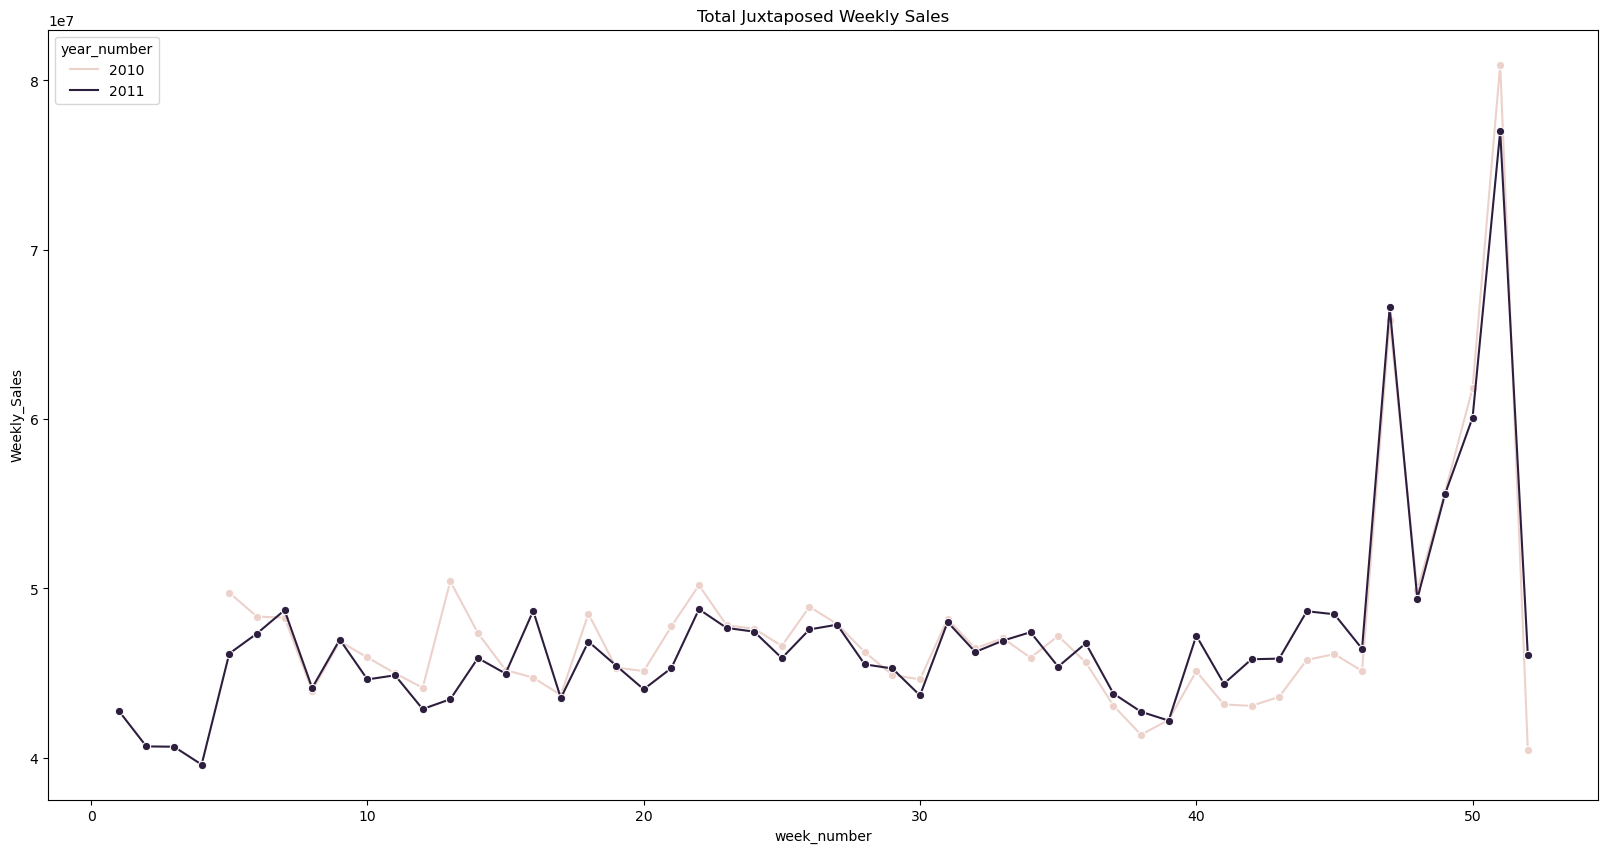

In [82]:
# Visualizing the total weekly sales trends over different years, grouped by week number and holiday status
another_agg = combined_data_train.groupby(['week_number', 'year_number', 'IsHoliday'], as_index=False).agg({ 'Weekly_Sales' : 'sum'})
plt.figure(figsize=(20,10))
plt.title('Total Juxtaposed Weekly Sales')
sns.lineplot(x="week_number", y="Weekly_Sales", hue="year_number", data = another_agg, marker = 'o')

          Date2 Store  Weekly_Sales
2075 2010-12-24    14    3818686.45
2082 2010-12-24    20    3766687.43
2071 2010-12-24    10    3749057.69
4443 2011-12-23     4    3676388.98
2074 2010-12-24    13    3595903.20
4414 2011-12-23    13    3556766.03
4422 2011-12-23    20    3555379.47
2103 2010-12-24     4    3526713.39
4411 2011-12-23    10    3487986.89
2081 2010-12-24     2    3436154.68


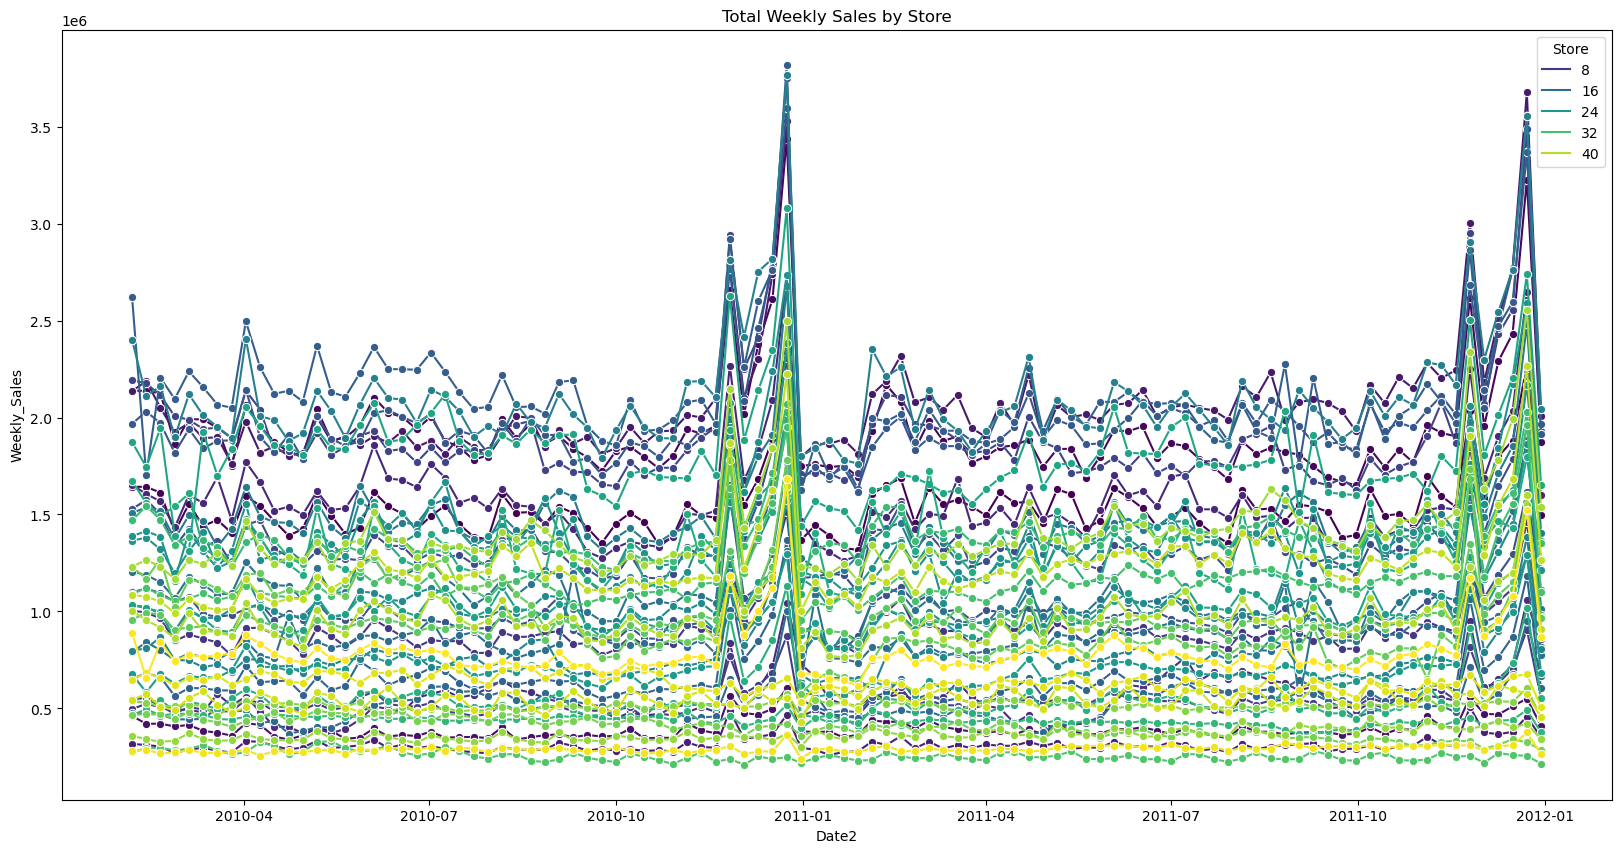

          Date2 Dept  Weekly_Sales
3301 2010-11-26   72   10533640.92
7292 2011-11-25   72   10089874.40
3605 2010-12-24    7    6490778.39
3607 2010-12-24   72    6020196.03
7606 2011-12-23    7    5535941.35
7608 2011-12-23   72    5028104.79
7623 2011-12-23   92    4647997.52
7307 2011-11-25   92    4330784.59
3620 2010-12-24   92    4203774.33
7543 2011-12-16   92    4093797.82


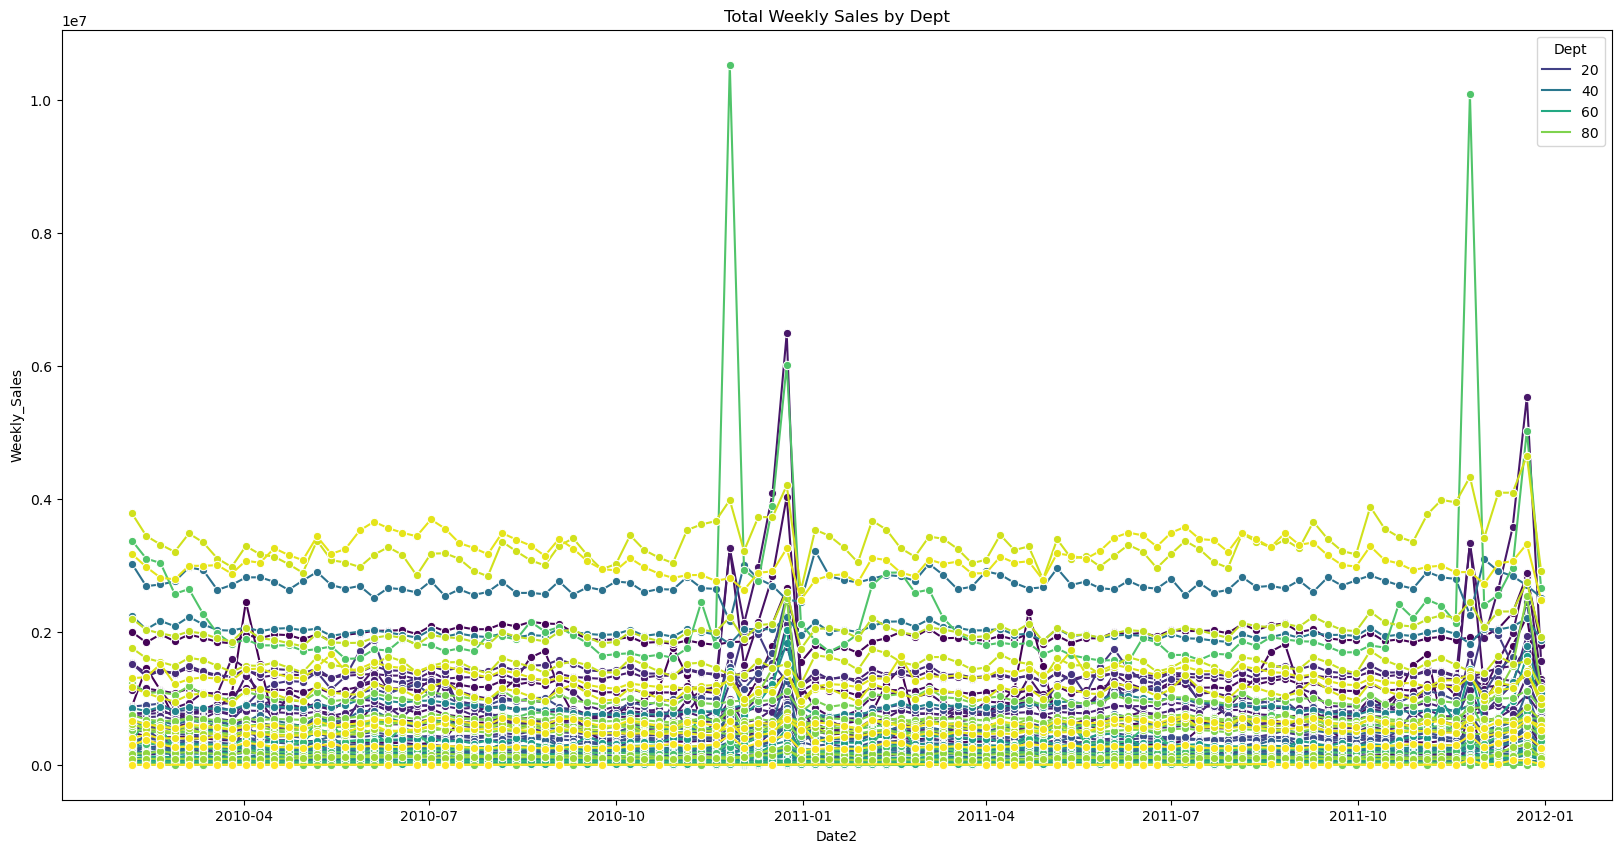

In [85]:
# Analyzing and visualizing total weekly sales for different stores and departments over time.
for var in ['Store', 'Dept']:
    agg_temp = combined_data_train.groupby(['Date2', var], as_index=False).agg({ 'Weekly_Sales' : 'sum'})
    print(agg_temp.sort_values(by='Weekly_Sales', ascending=False).head(10))
    plt.figure(figsize=(20,10))
    plt.title('Total Weekly Sales by ' + var)
    agg_temp[var] = pd.to_numeric(agg_temp[var])#The hue variable has to be numerical
    sns.lineplot(x="Date2", y="Weekly_Sales", hue=var, data = agg_temp, marker = 'o', palette="viridis") # Added palette for color
    plt.show() # Show the plot after each iteration of the loop

### Feature Creation

In [88]:
# Creating a new feature called holiday_type in the train dataset.
conditions = [combined_data_train['IsHoliday'] == 0, combined_data_train['week_number'] == 52, combined_data_train['week_number'] == 47, \
             combined_data_train['week_number'] == 36, combined_data_train['week_number'] == 6]
choices = ['no_holiday', 'christmas', 'thanksgiving', 'labor_day', 'super_bowl']

# Changing the default value to a string to match the choices type
combined_data_train['holiday_type'] = np.select(conditions, choices, default='unknown')
combined_data_train['holiday_type'].value_counts()

holiday_type
no_holiday      269595
thanksgiving      5946
christmas         5909
super_bowl        5879
labor_day         5875
Name: count, dtype: int64

In [90]:
# Creating new features related to specific holiday weeks and sales rush periods to help ML models\
# better understand and predict weekly sales patterns.
def season_variables(df):
    # Use .dt.isocalendar().week to get the week number
    df['week_number'] = df['Date2'].dt.isocalendar().week
    df['year_number'] = df['Date2'].dt.year
    conditions = [df['IsHoliday'] == 0, df['week_number'] == 52, df['week_number'] == 47, \
                 df['week_number'] == 36, df['week_number'] == 6]
    choices = ['no_holiday', 'christmas', 'thanksgiving', 'labor_day', 'super_bowl']
    # Change the default value to a string to match the choices type
    df['holiday_type' ] = np.select(conditions, choices, default='unknown')
    print(df['holiday_type'].value_counts())
    christmas_df = pd.DataFrame(df[df['holiday_type'] == 'christmas' ]['Date2'].unique())
    christmas_df.columns = ['christmas_week']
    christmas_df['minus1'] = christmas_df['christmas_week'] -  pd.to_timedelta(7, unit='d')
    christmas_df['minus2'] = christmas_df['christmas_week'] -  pd.to_timedelta(14, unit='d')
    christmas_df['minus3'] = christmas_df['christmas_week'] -  pd.to_timedelta(21, unit='d')
    #creating all the 5 binary variables
    df['christmas_week'] = np.where(df['Date2'].isin(list(christmas_df['christmas_week']) ),1,0 )
    df['christmas_minus1'] = np.where(df['Date2'].isin(list(christmas_df['minus1']) ),1,0 )
    df['christmas_minus2'] = np.where(df['Date2'].isin(list(christmas_df['minus2']) ),1,0 )
    df['christmas_minus3'] = np.where(df['Date2'].isin(list(christmas_df['minus3']) ),1,0 )
    df['thanksgiving_week'] = np.where(df['holiday_type'] == 'thanksgiving', 1, 0)
    print(df['christmas_week'].value_counts())
    print(df['christmas_minus1'].value_counts())
    print(df['christmas_minus2'].value_counts())
    print(df['christmas_minus3'].value_counts())
    print(df['thanksgiving_week'].value_counts())
    return df

In [91]:
# Modifying the combined_df_train dataset by adding new features related to seasons and holidays.
combined_data_train = season_variables(combined_data_train)

holiday_type
no_holiday      269595
thanksgiving      5946
christmas         5909
super_bowl        5879
labor_day         5875
Name: count, dtype: int64
christmas_week
0    287295
1      5909
Name: count, dtype: int64
christmas_minus1
0    287234
1      5970
Name: count, dtype: int64
christmas_minus2
0    287251
1      5953
Name: count, dtype: int64
christmas_minus3
0    287266
1      5938
Name: count, dtype: int64
thanksgiving_week
0    287258
1      5946
Name: count, dtype: int64


In [92]:
# Enriching the test data by adding engineered features related to holiday seasons and specific weeks. 
combined_data_test = season_variables(combined_data_test)

holiday_type
no_holiday    121057
super_bowl      2994
labor_day       2957
Name: count, dtype: int64
christmas_week
0    127008
Name: count, dtype: int64
christmas_minus1
0    127008
Name: count, dtype: int64
christmas_minus2
0    127008
Name: count, dtype: int64
christmas_minus3
0    127008
Name: count, dtype: int64
thanksgiving_week
0    127008
Name: count, dtype: int64


In [93]:
# Creating a new feature to potentially improve the accuracy of the sales prediction models.
store_dept_median = combined_data_train.groupby(['Store', 'Dept'], as_index=False).agg({'Weekly_Sales' :  ['median']})
print(store_dept_median.shape)
store_dept_median.columns = ["_".join(x) for x in store_dept_median.columns.ravel()]
store_dept_median.columns = ['Store', 'Dept', 'Weekly_Sales_median']
print(store_dept_median.head())

(3292, 3)
  Store Dept  Weekly_Sales_median
0     1    1            18988.700
1     1   10            30870.720
2     1   11            23574.725
3     1   12            10607.065
4     1   13            37848.040


In [94]:
# Adding the feature into train and test data
print(combined_data_train.shape)
combined_data_train2 = pd.merge(combined_data_train, store_dept_median, on=['Store', 'Dept'], how='left')
print(combined_data_train2.shape)
print(combined_data_test.shape)
combined_data_test2 = pd.merge(combined_data_test, store_dept_median, on=['Store', 'Dept'], how='left')
print(combined_data_test2.shape)

(293204, 25)
(293204, 26)
(127008, 25)
(127008, 26)


In [95]:
# Filling any missing values for new feature in test data with mean.
combined_data_test2['Weekly_Sales_median'].fillna(combined_data_test2['Weekly_Sales_median'].mean() , inplace=True)

### Modeling

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

### Using LSTM model for time series analysis

LSTM Test Loss (MSE): 5.674889689544216e-05
3969/3969 [==============================] - 1s 251us/step
LSTM Test RMSE: 5221.246759401041


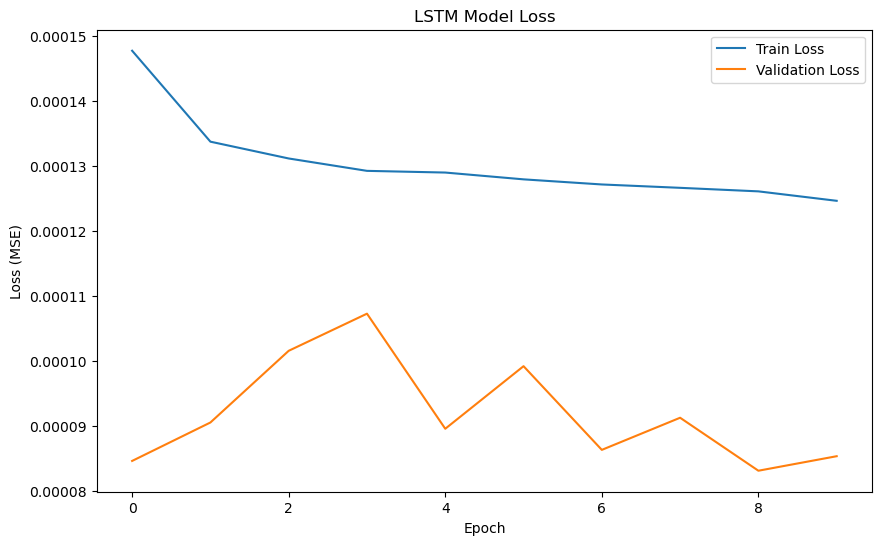

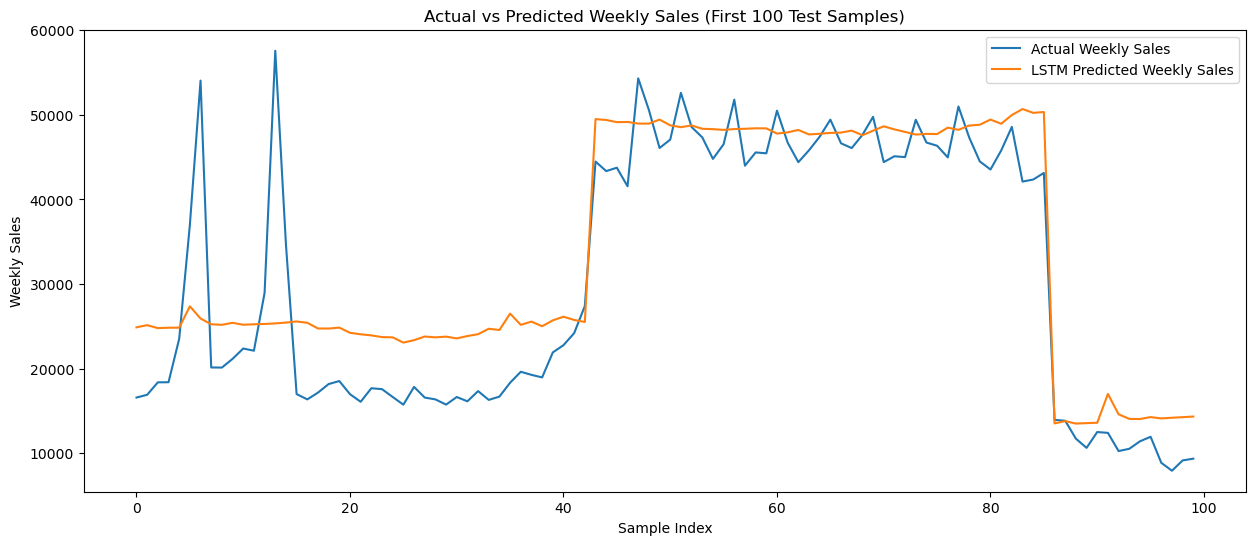

In [99]:
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Preparing data for LSTM
# Selecting relevant features for time series analysis
# Converting 'Date2' to numerical representation (ordinal)
combined_data_train2['Date_ordinal'] = combined_data_train2['Date2'].apply(lambda date: date.toordinal())
combined_data_test2['Date_ordinal'] = combined_data_test2['Date2'].apply(lambda date: date.toordinal())

lstm_features = ['Date_ordinal', 'Store', 'Dept', 'Size', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment',
                 'IsHoliday', 'christmas_week', 'christmas_minus1', 'christmas_minus2', 'christmas_minus3',
                 'thanksgiving_week', 'Weekly_Sales_median']
lstm_target = 'Weekly_Sales'

X_lstm_train = combined_data_train2[lstm_features]
y_lstm_train = combined_data_train2[lstm_target]
X_lstm_test = combined_data_test2[lstm_features]
y_lstm_test = combined_data_test2[lstm_target]

# Scaling the data
scaler_X = MinMaxScaler()
X_lstm_train_scaled = scaler_X.fit_transform(X_lstm_train)
X_lstm_test_scaled = scaler_X.transform(X_lstm_test)

scaler_y = MinMaxScaler()
y_lstm_train_scaled = scaler_y.fit_transform(y_lstm_train.values.reshape(-1, 1))
y_lstm_test_scaled = scaler_y.transform(y_lstm_test.values.reshape(-1, 1))

# Reshaping data for LSTM (samples, timesteps, features)
# For a simple time series without sequences, timesteps is 1
X_lstm_train_reshaped = X_lstm_train_scaled.reshape((X_lstm_train_scaled.shape[0], 1, X_lstm_train_scaled.shape[1]))
X_lstm_test_reshaped = X_lstm_test_scaled.reshape((X_lstm_test_scaled.shape[0], 1, X_lstm_test_scaled.shape[1]))

# Building the LSTM model
lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(50, activation='relu', input_shape=(X_lstm_train_reshaped.shape[1], X_lstm_train_reshaped.shape[2])),
    tf.keras.layers.Dense(1)
])

lstm_model.compile(optimizer='adam', loss='mse')

# Training the LSTM model
history = lstm_model.fit(X_lstm_train_reshaped, y_lstm_train_scaled, epochs=10, batch_size=32, validation_split=0.2, verbose=0)

# Evaluating the LSTM model on the test set
lstm_loss = lstm_model.evaluate(X_lstm_test_reshaped, y_lstm_test_scaled, verbose=0)
print(f"LSTM Test Loss (MSE): {lstm_loss}")

# Making predictions and inverse scale
y_lstm_pred_scaled = lstm_model.predict(X_lstm_test_reshaped)
y_lstm_pred = scaler_y.inverse_transform(y_lstm_pred_scaled)

# Calculating RMSE for LSTM
lstm_rmse = np.sqrt(mean_squared_error(y_lstm_test, y_lstm_pred))
print(f"LSTM Test RMSE: {lstm_rmse}")

# Plotting training history (loss)
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('LSTM Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

# Plotting some predictions vs actual values
plt.figure(figsize=(15, 6))
plt.plot(y_lstm_test.values[:100], label='Actual Weekly Sales')
plt.plot(y_lstm_pred[:100], label='LSTM Predicted Weekly Sales')
plt.title('Actual vs Predicted Weekly Sales (First 100 Test Samples)')
plt.xlabel('Sample Index')
plt.ylabel('Weekly Sales')
plt.legend()
plt.show()

### Building Additional Models for Comparison

In [101]:
# Defining features (X) and target (y)
features = ['Size', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'IsHoliday', 'week_number', 'year_number',
            'christmas_week', 'christmas_minus1', 'christmas_minus2', 'christmas_minus3', 'thanksgiving_week',
            'Weekly_Sales_median']
target = 'Weekly_Sales'

# Creating a function to train and evaluate models
def train_and_evaluate(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculating MSE and then take the square root for RMSE
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    return rmse

# Preparing data for modeling
X = combined_data_train2[features]
y = combined_data_train2[target]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Model 1: Linear Regression
lr_model = LinearRegression()
lr_rmse = train_and_evaluate(lr_model, X_train, y_train, X_val, y_val)
print(f"Linear Regression RMSE: {lr_rmse}")

# Model 2: Decision Tree Regression
dt_model = DecisionTreeRegressor(random_state=42)
dt_rmse = train_and_evaluate(dt_model, X_train, y_train, X_val, y_val)
print(f"Decision Tree RMSE: {dt_rmse}")

# Model 3: Random Forest Regression
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_rmse = train_and_evaluate(rf_model, X_train, y_train, X_val, y_val)
print(f"Random Forest RMSE: {rf_rmse}")

# Using the trained models to make prediction on the test data
X_test = combined_data_test2[features]
y_test = combined_data_test2[target]

Linear Regression RMSE: 7731.056599288226
Decision Tree RMSE: 7446.287234336847
Random Forest RMSE: 6068.2742049016415


### Comparison of Models

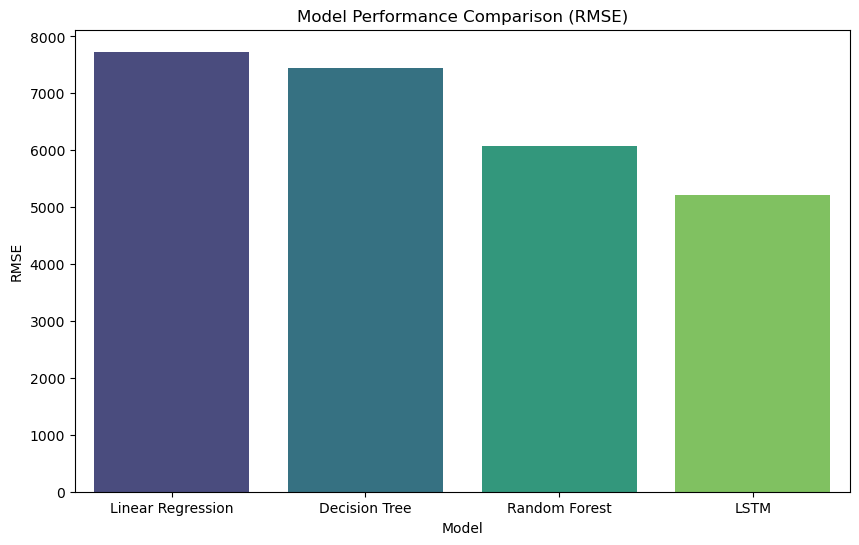


Model Performance Comparison (RMSE):
Linear Regression: 7731.06
Decision Tree: 7446.29
Random Forest: 6068.27
LSTM: 5221.25


In [103]:
# Comparing model performances
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'LSTM']
rmse_scores = [lr_rmse, dt_rmse, rf_rmse, lstm_rmse]

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=rmse_scores, palette='viridis')
plt.title('Model Performance Comparison (RMSE)')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.show()

# Print RMSE values for clear comparison
print("\nModel Performance Comparison (RMSE):")
for model, rmse in zip(models, rmse_scores):
  print(f"{model}: {rmse:.2f}")

### Conclusion

#### The LSTM model outperformed in completing the forecasting for Walmart’s weekly sales. It achieved the lowest RMSE of 5,304.95 among all models tested (closest alternate would be Random Forest with RMSE of 6,082.37). Its ability to capture complex, non-linear temporal dependencies allowed it to learn patterns from historical data, even during promotional sales, holidays, and seasonal trends. LSTM outperformed the traditional models, validating its strength in time series prediction. This was accomplished by leveraging lag and other features as well as normalized sequences. This success highlights the model’s knack for accurate, data-driven decision making in retail operations, especially when conducting inventory planning or resource allocation.n.
